In [1]:
import pandas as pd

import matplotlib

import matplotlib.pyplot as plt

import scipy.stats

from pmdarima import auto_arima

from arch import arch_model

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error

import statsmodels.tsa.stattools as sts

from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.graphics.tsaplots as sgt

from statsmodels.tsa.arima.model import ARIMA

from  scipy.stats.distributions import chi2

from statsmodels.tsa.api import VAR

from statsmodels.tsa.stattools import grangercausalitytests

import numpy as np

import seaborn as sns

import itertools

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('BD preprocesada II.csv',sep=',')

# Formatear columna Fecha como datetime

df['Fecha'] = pd.to_datetime(df['Fecha'])

df.head()

Fecha       AUM FIC      Efectivo  Reserva Bancaria  \
0 2018-01-01  4.277819e+07  58512.003886      28754.777759   
1 2018-01-02  4.346588e+07  58512.003886      28754.777759   
2 2018-01-03  4.427526e+07  58512.003886      28754.777759   
3 2018-01-04  4.457223e+07  58512.003886      28754.777759   
4 2018-01-05  4.464074e+07  58512.003886      28754.777759   

   Del sector privado  Del sector público  Cuentas de ahorro         CDT 1/  \
0        35602.554628        10671.094981      170017.348229  160226.125352   
1        35602.554628        10671.094981      170017.348229  160226.125352   
2        35602.554628        10671.094981      170017.348229  160226.125352   
3        35602.554628        10671.094981      170017.348229  160226.125352   
4        35602.554628        10671.094981      170017.348229  160226.125352   

   Otros depósitos a la vista  Inflación anual %  ...  Tasa A 120 días  \
0                 5328.184972               3.68  ...         0.052668   
1                 5328.184972               3.37  ...         0.052668   
2                 5328.184972               3.37  ...         0.053122   
3                 5328.184972               3.37  ...         0.050867   
4                 5328.184972               3.37  ...         0.051841   

   Tasa Entre 121 y 179 días  Tasa A 180 días  Tasa Entre 181 y 359 días  \
0                   0.055417         0.052354                   0.058845   
1                   0.055417         0.052354                   0.058845   
2                   0.056538         0.054354                   0.059277   
3                   0.054752         0.053794                   0.058336   
4                   0.055389         0.054582                   0.056345   

   Tasa A 360 días  Tasa Superiores a 360 días  \
0         0.057049                    0.061108   
1         0.057049                    0.061108   
2         0.055647                    0.065069   
3         0.056066                    0.066029   
4         0.055165                    0.062512   

   Tasa Captaciones a través de CDT por red de oficinas  \
0                                           0.052959      
1                                           0.052959      
2                                           0.052840      
3                                           0.052695      
4                                           0.052718      

   Tasa Captaciones a través de CDT por tesorería  Valor hoy    VALOR  
0                                        0.058457     286.55  2940.94  
1                                        0.058457     286.55  2940.94  
2                                        0.064005     286.55  2940.94  
3                                        0.064102     286.55  2908.68  
4                                        0.057780     286.55  2885.76  

[5 rows x 29 columns]

In [3]:
# Fecha como índice

df.set_index('Fecha',inplace=True)

df.head()

AUM FIC      Efectivo  Reserva Bancaria  Del sector privado  \
Fecha                                                                          
2018-01-01  4.277819e+07  58512.003886      28754.777759        35602.554628   
2018-01-02  4.346588e+07  58512.003886      28754.777759        35602.554628   
2018-01-03  4.427526e+07  58512.003886      28754.777759        35602.554628   
2018-01-04  4.457223e+07  58512.003886      28754.777759        35602.554628   
2018-01-05  4.464074e+07  58512.003886      28754.777759        35602.554628   

            Del sector público  Cuentas de ahorro         CDT 1/  \
Fecha                                                              
2018-01-01        10671.094981      170017.348229  160226.125352   
2018-01-02        10671.094981      170017.348229  160226.125352   
2018-01-03        10671.094981      170017.348229  160226.125352   
2018-01-04        10671.094981      170017.348229  160226.125352   
2018-01-05        10671.094981      170017.348229  160226.125352   

            Otros depósitos a la vista  Inflación anual %  \
Fecha                                                       
2018-01-01                 5328.184972               3.68   
2018-01-02                 5328.184972               3.37   
2018-01-03                 5328.184972               3.37   
2018-01-04                 5328.184972               3.37   
2018-01-05                 5328.184972               3.37   

            Tasa de intervención de política monetaria (%)  ...  \
Fecha                                                       ...   
2018-01-01                                            4.75  ...   
2018-01-02                                            4.75  ...   
2018-01-03                                            4.75  ...   
2018-01-04                                            4.75  ...   
2018-01-05                                            4.75  ...   

            Tasa A 120 días  Tasa Entre 121 y 179 días  Tasa A 180 días  \
Fecha                                                                     
2018-01-01         0.052668                   0.055417         0.052354   
2018-01-02         0.052668                   0.055417         0.052354   
2018-01-03         0.053122                   0.056538         0.054354   
2018-01-04         0.050867                   0.054752         0.053794   
2018-01-05         0.051841                   0.055389         0.054582   

            Tasa Entre 181 y 359 días  Tasa A 360 días  \
Fecha                                                    
2018-01-01                   0.058845         0.057049   
2018-01-02                   0.058845         0.057049   
2018-01-03                   0.059277         0.055647   
2018-01-04                   0.058336         0.056066   
2018-01-05                   0.056345         0.055165   

            Tasa Superiores a 360 días  \
Fecha                                    
2018-01-01                    0.061108   
2018-01-02                    0.061108   
2018-01-03                    0.065069   
2018-01-04                    0.066029   
2018-01-05                    0.062512   

            Tasa Captaciones a través de CDT por red de oficinas  \
Fecha                                                              
2018-01-01                                           0.052959      
2018-01-02                                           0.052959      
2018-01-03                                           0.052840      
2018-01-04                                           0.052695      
2018-01-05                                           0.052718      

            Tasa Captaciones a través de CDT por tesorería  Valor hoy    VALOR  
Fecha                                                                           
2018-01-01                                        0.058457     286.55  2940.94  
2018-01-02                                        0.058457     286.55  2940.94  
2018-01-03                                        0.

In [4]:
diferencia = df.index.to_series().diff().dt.total_seconds()

diferencia.value_counts()

Fecha
86400.0    2410
0.0          22
Name: count, dtype: int64

In [5]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=False)

In [6]:
df.shape

(2411, 28)

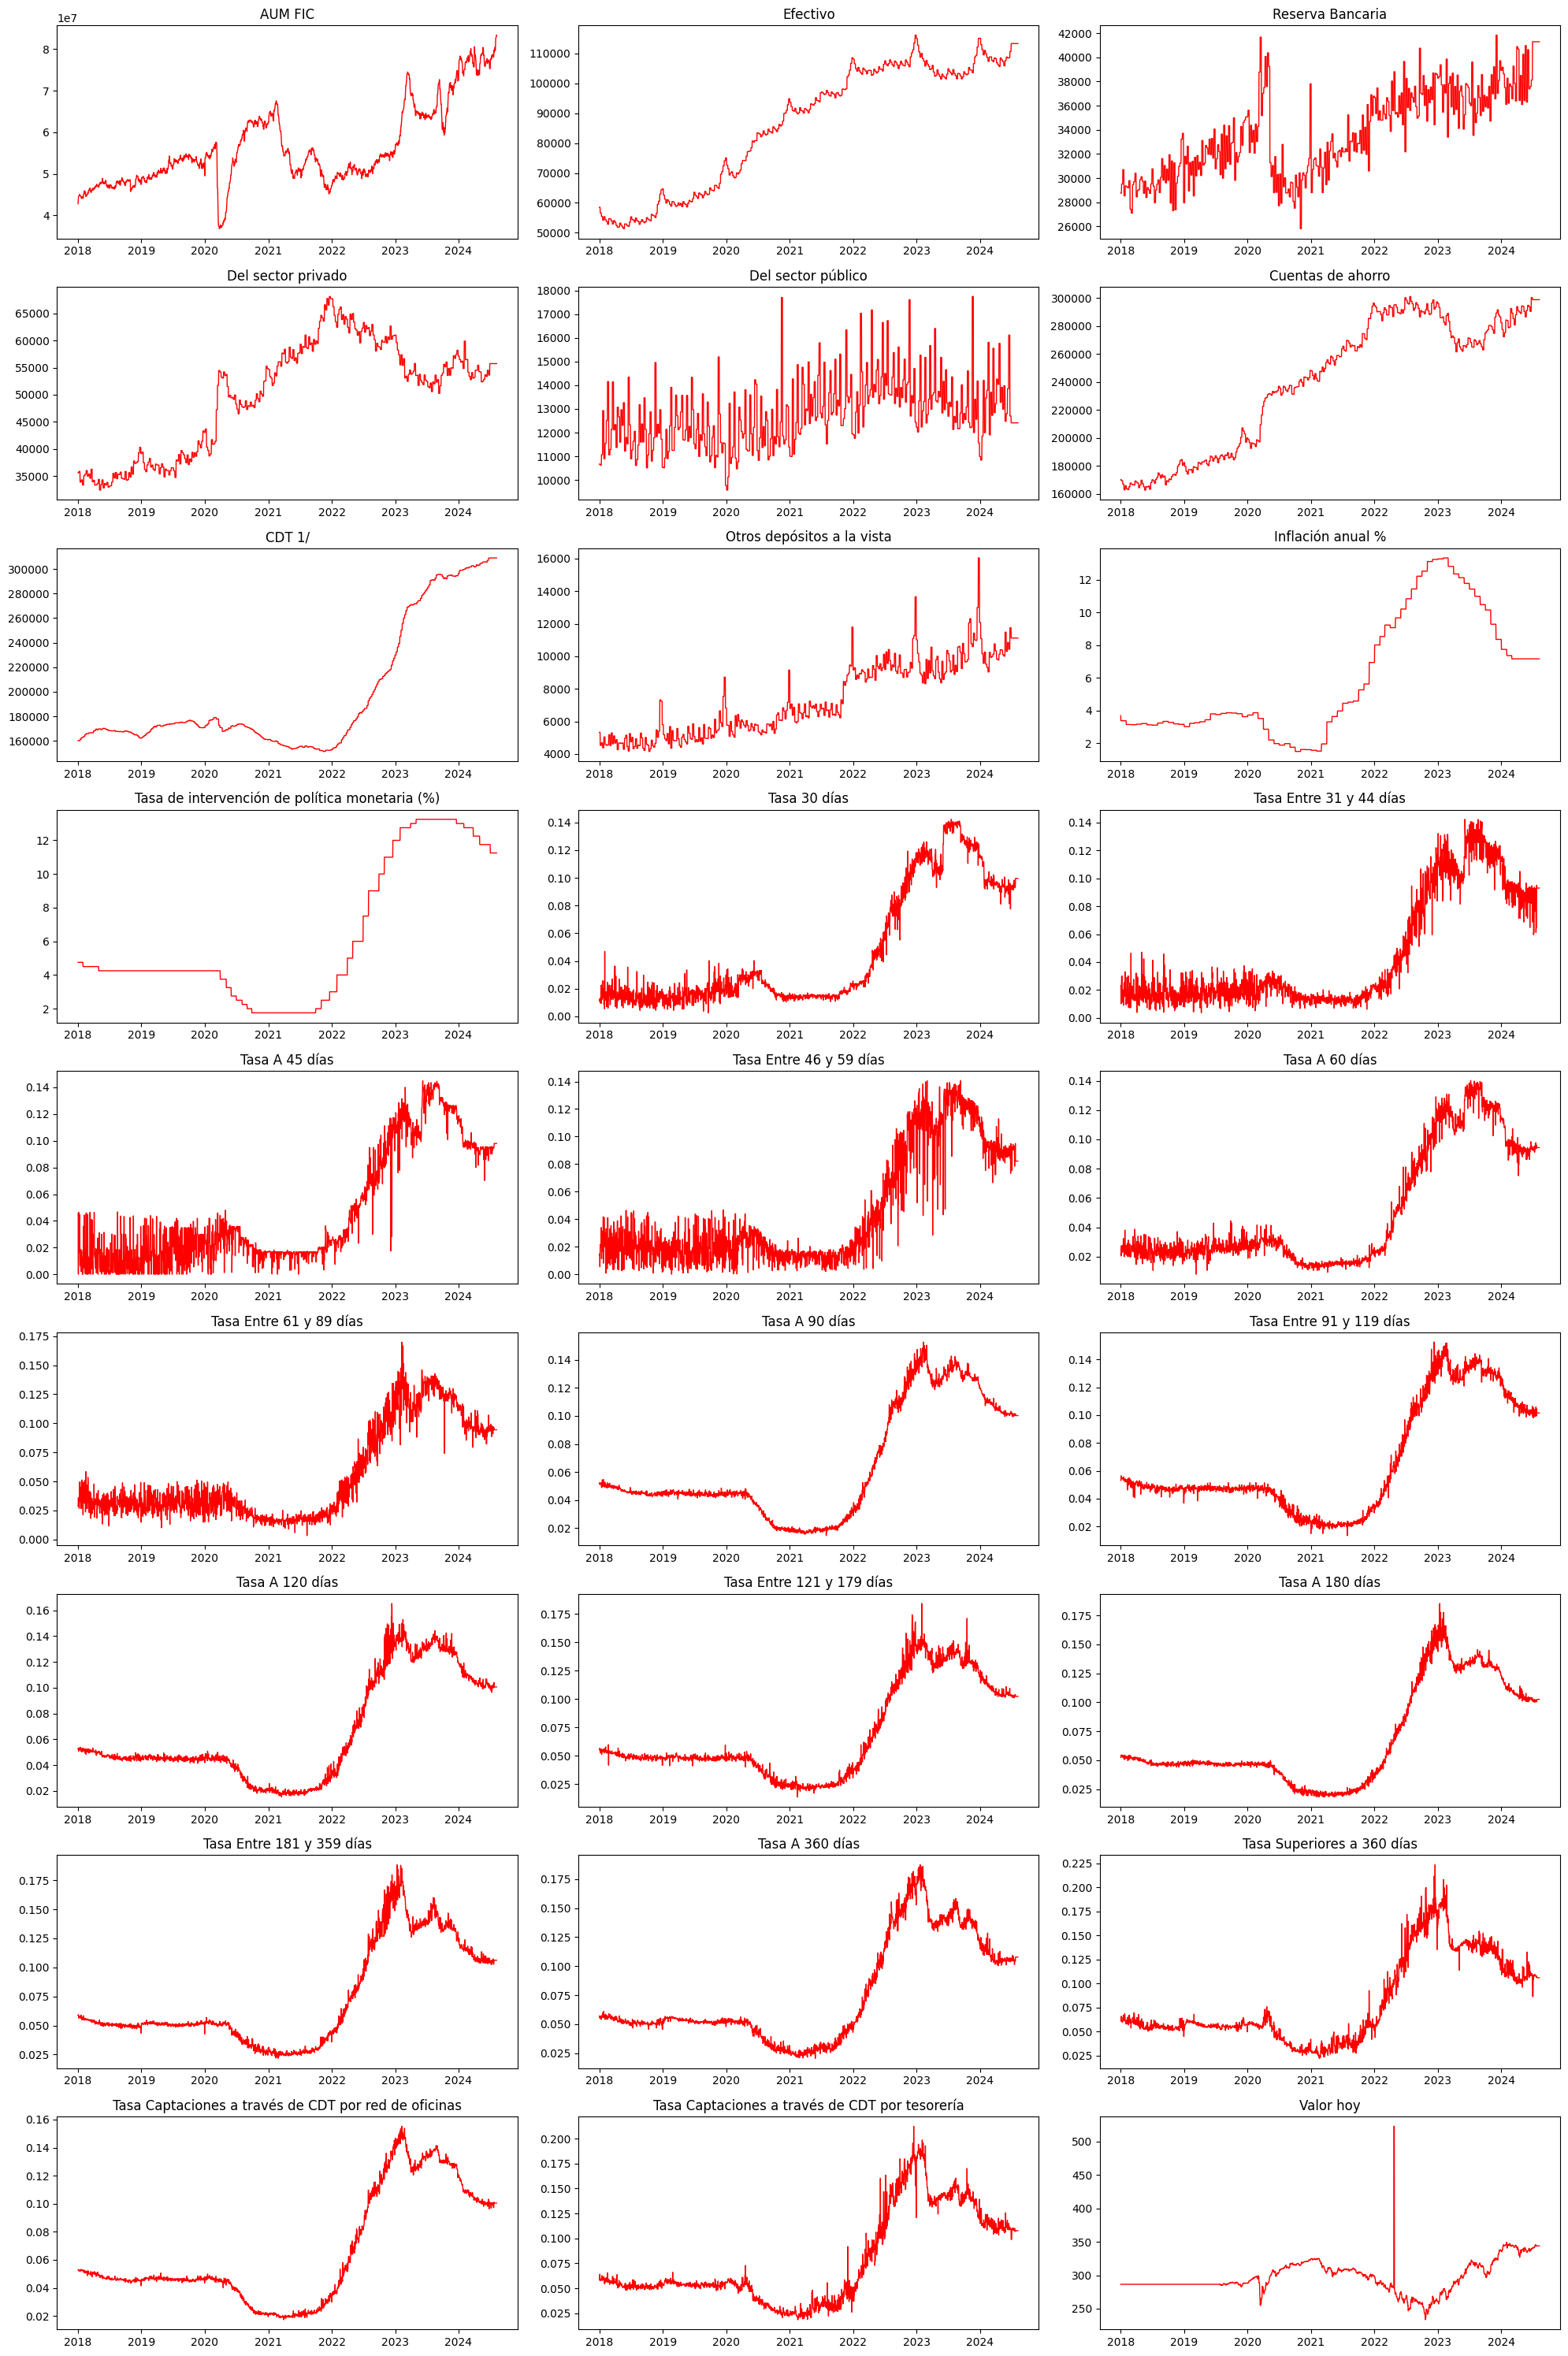

In [7]:
fig,axes = plt.subplots(nrows=9,ncols=3, figsize = (20,30))

for i,ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data,color='red', linewidth = 1)

    # Ajustes al gráfico

    ax.set_title(df.columns[i])


plt.tight_layout()

## Relación variables



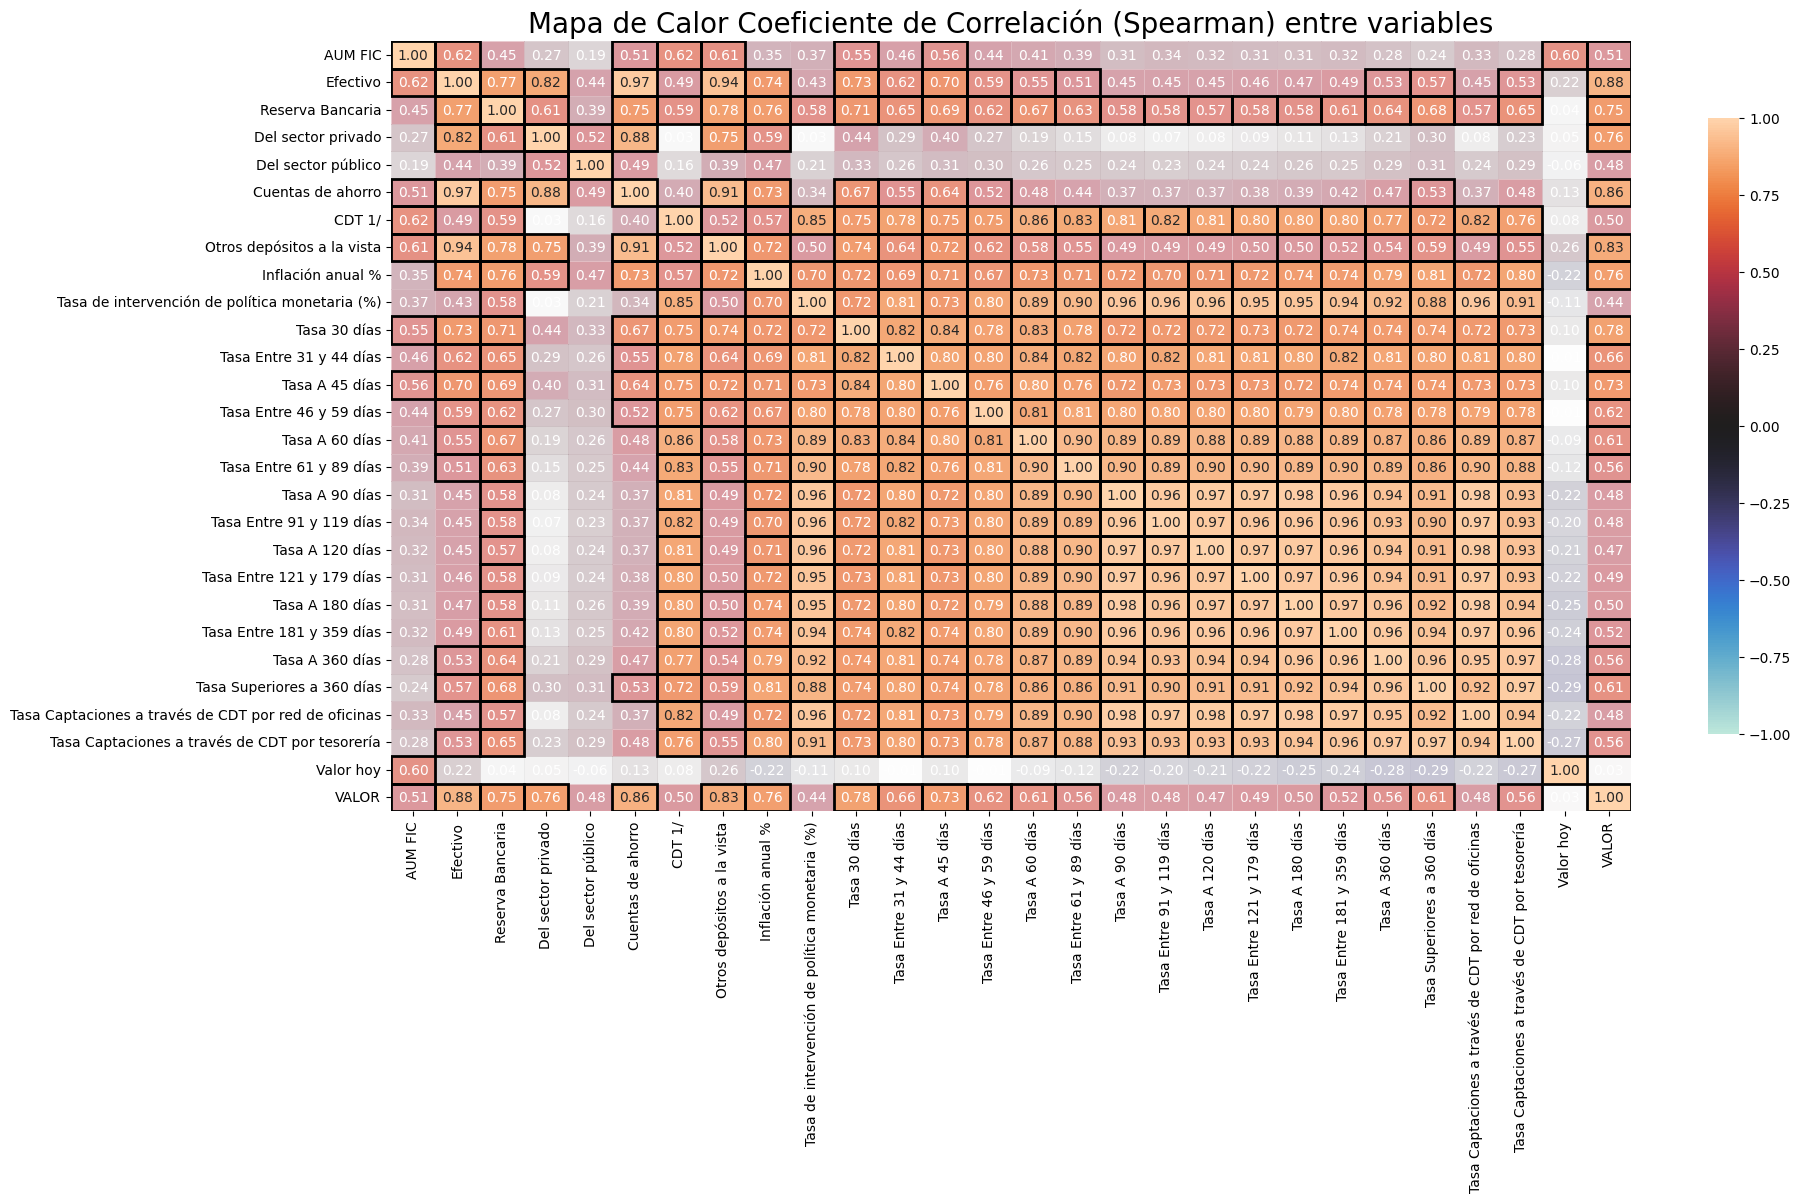

In [23]:
corr_s = df.corr(method='spearman')

plt.subplots(figsize = (20,10))

# sns.heatmap(corr_s,xticklabels= corr_s.columns.values , yticklabels= corr_s.columns.values ,  annot= True , vmax= 1, vmin= -1, cmap= sns.diverging_palette(220,10, as_cmap= True),center=0)

alpha = np.abs(corr_s)

# cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(corr_s, annot=True, fmt=".2f",
             linewidths=0.5, vmin=-1, vmax=1, center=0,
            cbar_kws={"shrink": 0.8}, alpha=alpha.values)

# Resaltar correlaciones altas y bajas con bordes gruesos
for i in range(len(corr_s)):
    for j in range(len(corr_s)):
        value = corr_s.iloc[i, j]
        if abs(value) > 0.5:  # Resaltar correlaciones altas (>0.7 o <-0.7)
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=2))

plt.title("Mapa de Calor Coeficiente de Correlación (Spearman) entre variables", fontsize=20)

# plt.xticks(rotation=45)


plt.show()


In [316]:
serie = df[['AUM FIC','Efectivo']]

serie.head()

AUM FIC      Efectivo
Fecha                                 
2018-01-01  4.277819e+07  58512.003886
2018-01-02  4.346588e+07  58512.003886
2018-01-03  4.427526e+07  58512.003886
2018-01-04  4.457223e+07  58512.003886
2018-01-05  4.464074e+07  58512.003886

In [317]:
sts.adfuller(serie['AUM FIC'])

(-1.0837189758482664,
 0.721520727915121,
 15,
 2395,
 {'1%': -3.4330833288586047,
  '5%': -2.8627475469019337,
  '10%': -2.567412827916545},
 68737.50075061287)

In [318]:
sts.adfuller(serie['Efectivo'])

(-0.7964296504874624,
 0.8201685816844384,
 21,
 2389,
 {'1%': -3.433090201041693,
  '5%': -2.862750581542575,
  '10%': -2.567414443618994},
 35927.9056022749)

Volver la serie estacionaria con las diferencias

In [319]:
serie_dif = serie.diff().dropna()

serie_dif = serie_dif[(serie_dif != 0).all(axis=1)]

serie_dif

AUM FIC     Efectivo
Fecha                                
2018-01-06   6734.988641 -1912.465334
2018-01-13   7047.624598 -1158.360789
2018-01-20   6779.730104 -1210.942647
2018-01-27   8954.972046  1139.615413
2018-02-03   6038.756100 -1013.654724
...                  ...          ...
2024-06-01  22557.398097  1160.292575
2024-06-08  21575.713932  -320.642989
2024-06-15  20545.053360   125.324028
2024-06-22  17301.417742  2068.283621
2024-06-29  24667.715961  2645.747965

[339 rows x 2 columns]

In [320]:
# serie_dif = serie_dif.diff().dropna()

# serie_dif = serie_dif[(serie_dif != 0).all(axis=1)]

# serie_dif

In [321]:
lista = serie_dif.index

serie_filtrada = serie.loc[lista]

serie_filtrada

AUM FIC       Efectivo
Fecha                                  
2018-01-06  4.464748e+07   56599.538551
2018-01-13  4.472463e+07   55441.177763
2018-01-20  4.419130e+07   54230.235116
2018-01-27  4.425412e+07   55369.850529
2018-02-03  4.510664e+07   54356.195805
...                  ...            ...
2024-06-01  7.587088e+07  108830.824490
2024-06-08  7.707061e+07  108510.181501
2024-06-15  7.657252e+07  108635.505529
2024-06-22  7.708270e+07  110703.789150
2024-06-29  7.533655e+07  113349.537115

[339 rows x 2 columns]

In [322]:
sts.adfuller(serie_dif['AUM FIC'])

(-12.158888556592519,
 1.509623480231161e-22,
 1,
 337,
 {'1%': -3.4499043309021955,
  '5%': -2.870154885338925,
  '10%': -2.5713597190254385},
 8359.021801246883)

In [323]:
sts.adfuller(serie_dif['Efectivo'])

(-5.023479980657041,
 1.9937072355934818e-05,
 16,
 322,
 {'1%': -3.4508226600665037,
  '5%': -2.870558121868621,
  '10%': -2.571574731684734},
 5148.559114267848)

In [324]:
def tsplot (y,lags = None, figsize = (18,7),style = 'bmh'):
    if not isinstance(y,pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout,(0,0),colspan=2)
        acf_ax = plt.subplot2grid(layout,(1,0))
        pacf_ax = plt.subplot2grid(layout,(1,1))    

        y.plot(ax=ts_ax)
        p_value = sts.adfuller(y)[1]
        ts_ax.set_title('Gráfico de análisis de Serie de Tiempo Dickey- Fuller: p={0:.5f}'.format(p_value))
        sgt.plot_acf(y,lags=lags, ax=acf_ax)
        sgt.plot_pacf(y,lags=lags,ax=pacf_ax)
        plt.tight_layout()
        plt.show()

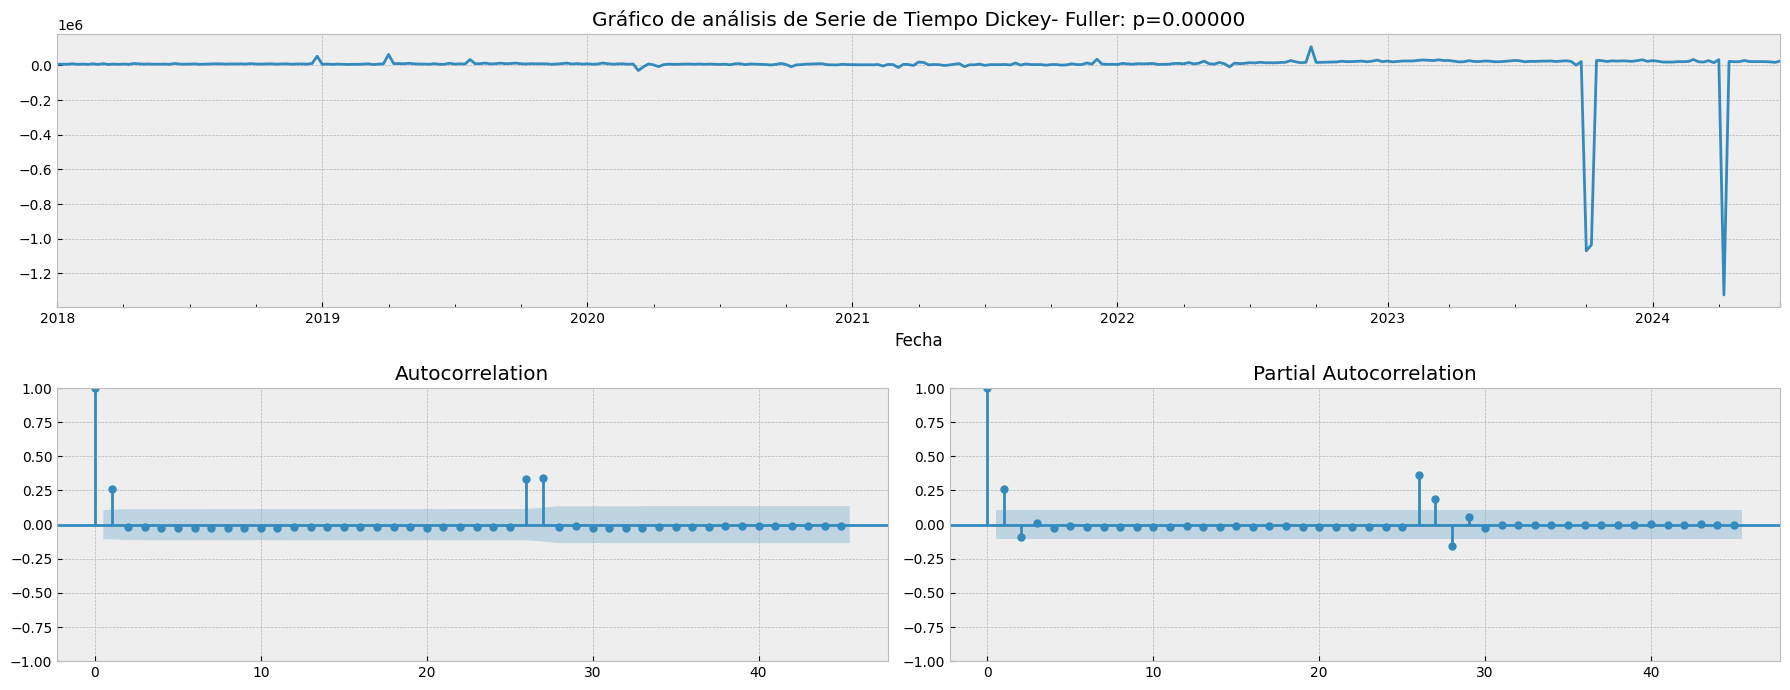

In [325]:
tsplot(serie_dif['AUM FIC'],lags=45)

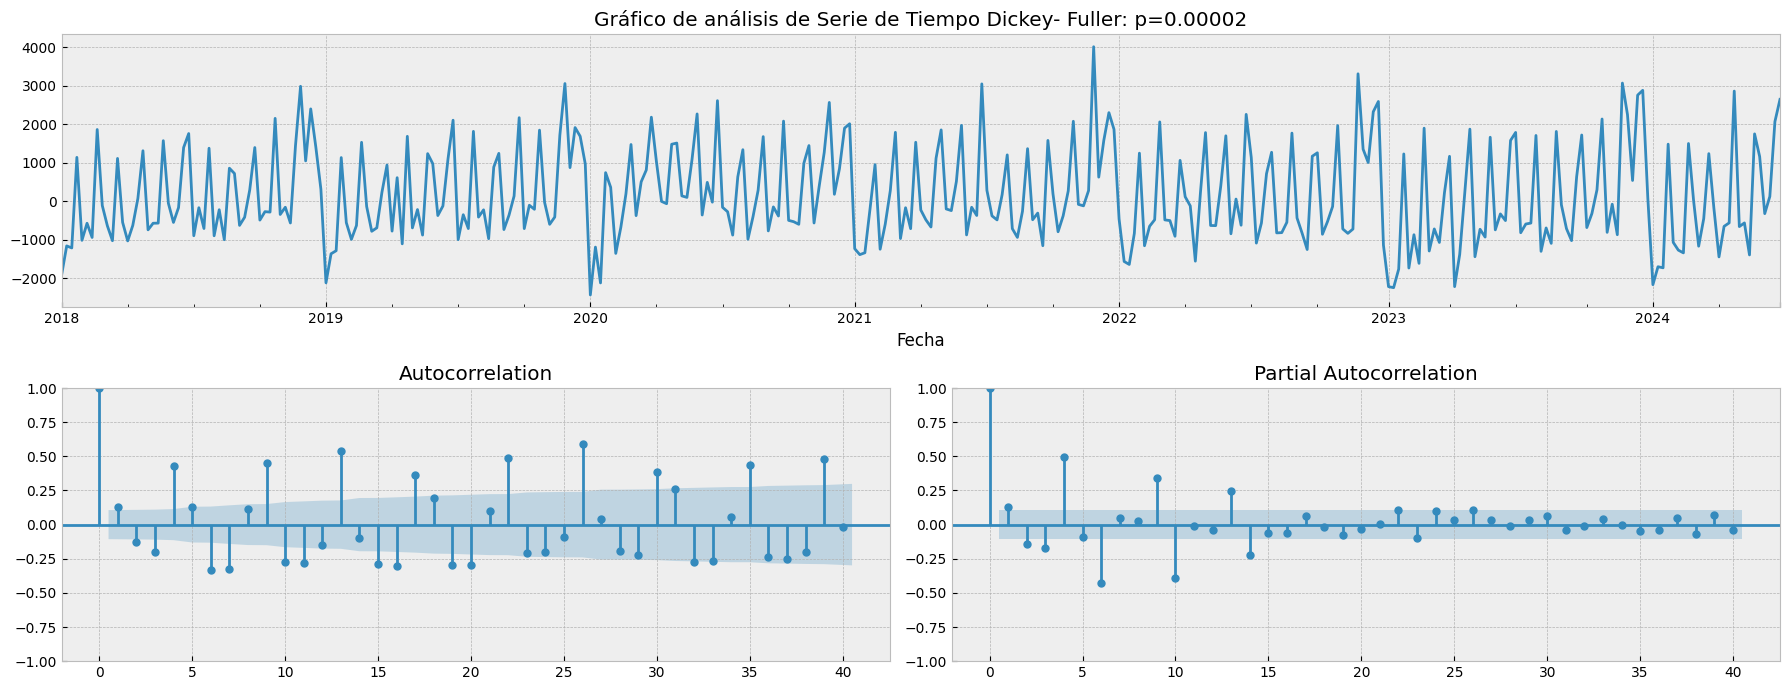

In [326]:
tsplot(serie_dif['Efectivo'],lags=40)

In [327]:
train = serie_dif.iloc[:332]

test = serie_dif.iloc[332:]

## ARIMA

In [328]:
# Definir función de 

def LLR_test(mod_1,mod_2, DF= 1):

    L1 = mod_1.llf
    L2= mod_2.llf
    LR= (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p


Modelo ARIMA

In [329]:
# p=d=q = range(0,5)

# pdq = list(itertools.product(p, d, q))

# # Función para encontrar el mejor modelo ARIMA basado en AIC
# def find_best_arima_model(ts, pdq):
#     best_aic = np.inf
#     best_pdq = None
#     best_model = None

#     for param in pdq:
#         try:
#             model = ARIMA(train['AUM FIC'], order=param)
#             results = model.fit()
#             if results.aic < best_aic:
#                 best_aic = results.aic
#                 best_pdq = param
#                 best_model = results
#         except:
#             continue
    
#     return best_pdq, best_model

# best_pdq, best_model = find_best_arima_model(train['AUM FIC'], pdq)

# print(f'Mejor AIC: {best_model.aic}')
# print(f'Mejor orden (p, d, q): {best_pdq}')
# print(best_model.summary())

In [330]:
model_arima = ARIMA(train['AUM FIC'],order = (2,4,3))

results_arima = model_arima.fit(method='innovations_mle')

print(results_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                AUM FIC   No. Observations:                  332
Model:                 ARIMA(2, 4, 3)   Log Likelihood               -4443.613
Date:                Thu, 28 Nov 2024   AIC                           8899.226
Time:                        21:49:05   BIC                           8921.984
Sample:                    01-06-2018   HQIC                          8908.306
                         - 05-11-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5739      0.011   -144.168      0.000      -1.595      -1.553
ar.L2         -0.6574      0.016    -39.982      0.000      -0.690      -0.625
ma.L1         -0.9966      0.339     -2.942      0.0

In [331]:
start = len(train)

end = len(train) + len(test) - 1

rename = f'ARIMA(3,5,6) Predictions'

fcast_arima = results_arima.predict(start =start, end = end ,dynamic=False).rename(rename)

In [332]:
pred_arima = pd.DataFrame(fcast_arima,index=fcast_arima.index)

pred_arima = pred_arima.rename(columns={'ARIMA(3,5,6) Predictions': 'AUM FIC'})

pred_arima

AUM FIC
2024-05-18 -4.051748e+05
2024-05-25 -1.523554e+05
2024-06-01 -6.927203e+05
2024-06-08 -4.384398e+05
2024-06-15 -9.160886e+05
2024-06-22 -7.668110e+05
2024-06-29 -1.125847e+06

In [333]:
n_obs = 7

In [334]:
def invert_transformation(df_train , df_forecast , second_diff = False):

    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        if second_diff:
            df_fc[str(col) + '_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col) + '_2d'].cumsum()

        df_fc[str(col) + '_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)].cumsum()

    return df_fc      

In [335]:
resultados_arima = invert_transformation(pd.DataFrame(serie_filtrada['AUM FIC'][-n_obs:])[-n_obs:],pred_arima[-n_obs:],second_diff=False)

resultados_arima

AUM FIC  AUM FIC_forecast
2024-05-18 -4.051748e+05      7.493137e+07
2024-05-25 -1.523554e+05      7.477902e+07
2024-06-01 -6.927203e+05      7.408630e+07
2024-06-08 -4.384398e+05      7.364786e+07
2024-06-15 -9.160886e+05      7.273177e+07
2024-06-22 -7.668110e+05      7.196496e+07
2024-06-29 -1.125847e+06      7.083911e+07

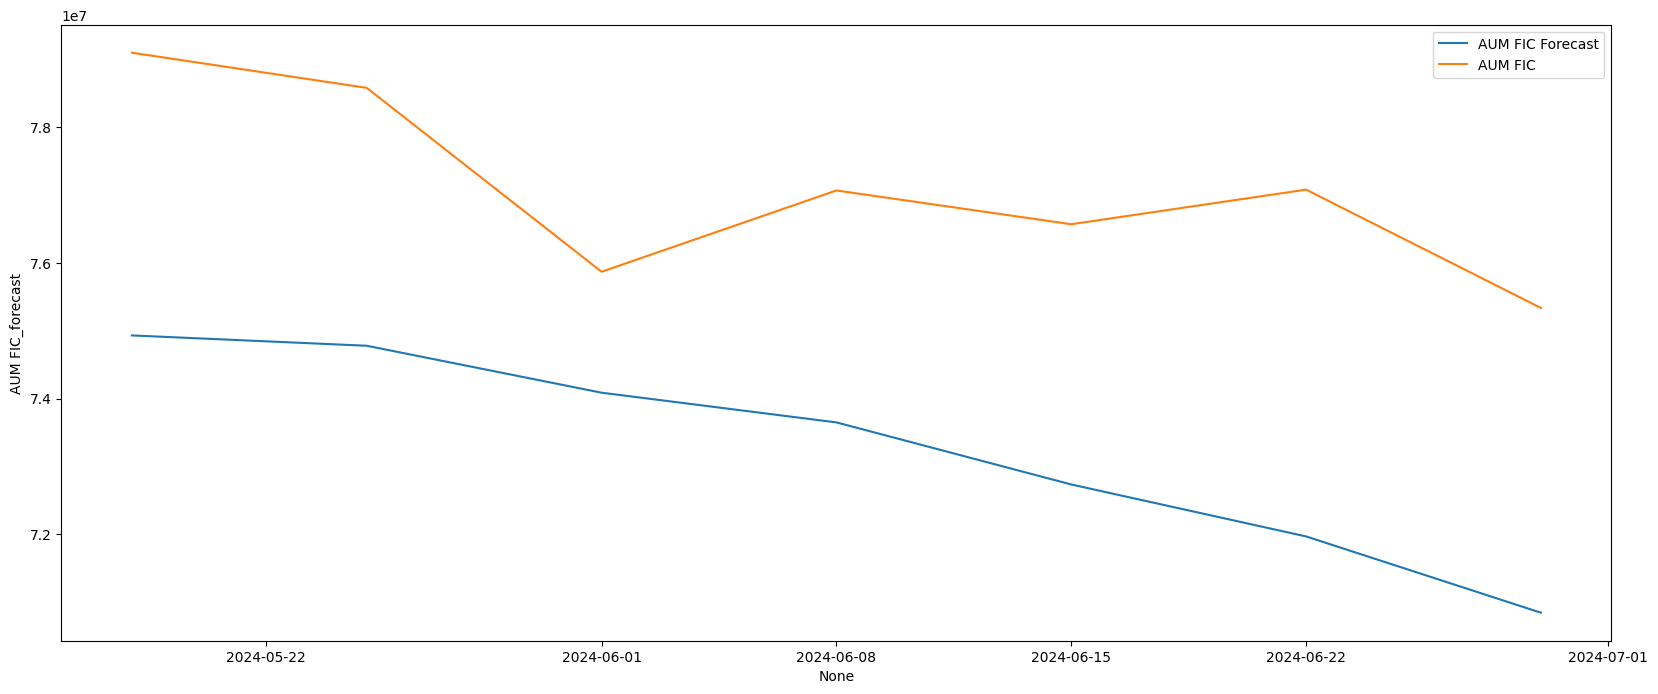

In [336]:
plt.rcParams['figure.figsize'] = (20,8)

sns.lineplot(resultados_arima, x= resultados_arima.index, y=resultados_arima['AUM FIC_forecast'],label = 'AUM FIC Forecast')

sns.lineplot(serie_filtrada[-n_obs:], x= serie_filtrada.index[-n_obs:], y=serie_filtrada['AUM FIC'][-n_obs:],label = 'AUM FIC')

plt.show()


# ARIMAX

In [337]:
serie_dif

AUM FIC     Efectivo
Fecha                                
2018-01-06   6734.988641 -1912.465334
2018-01-13   7047.624598 -1158.360789
2018-01-20   6779.730104 -1210.942647
2018-01-27   8954.972046  1139.615413
2018-02-03   6038.756100 -1013.654724
...                  ...          ...
2024-06-01  22557.398097  1160.292575
2024-06-08  21575.713932  -320.642989
2024-06-15  20545.053360   125.324028
2024-06-22  17301.417742  2068.283621
2024-06-29  24667.715961  2645.747965

[339 rows x 2 columns]

In [338]:
exogenas = serie_dif[['AUM FIC','Efectivo']]

scaler = StandardScaler()

exogenas_escaladas = scaler.fit_transform(exogenas[['AUM FIC','Efectivo']])

exogenas[['AUM FIC','Efectivo']] = exogenas_escaladas

train_ex = exogenas.iloc[:332]

test_ex = exogenas.iloc[332:]

model_arimax = ARIMA(train_ex['AUM FIC'],exog=train_ex[['AUM FIC','Efectivo']], order=(2,3,3))

results_arimax = model_arimax.fit()

print(results_arimax.summary())

                               SARIMAX Results                                
Dep. Variable:                AUM FIC   No. Observations:                  332
Model:                 ARIMA(2, 3, 3)   Log Likelihood                3140.102
Date:                Thu, 28 Nov 2024   AIC                          -6264.203
Time:                        21:49:06   BIC                          -6233.835
Sample:                    01-06-2018   HQIC                         -6252.089
                         - 05-11-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AUM FIC        1.0000   2.28e-07   4.39e+06      0.000       1.000       1.000
Efectivo   -7.665e-07   1.79e-06     -0.429      0.668   -4.27e-06    2.74e-06
ar.L1         -0.9533   2.57e-11   -3.7e+10      0.0

In [339]:
start = len(train_ex)

end = len(train_ex) + len(test_ex) - 1

rename = f'ARIMAX Predictions'

fcast_arimax = results_arimax.predict(start = start, end = end ,exog =  test_ex[['AUM FIC','Efectivo']] ,dynamic=False).rename(rename)

In [340]:
pred_arimax = pd.DataFrame(fcast_arimax,index=fcast_arimax.index)

pred_arimax = pred_arimax.rename(columns={'ARIMAX Predictions': 'AUM FIC'})

pred_arimax

AUM FIC
2024-05-18  0.179806
2024-05-25  0.180456
2024-06-01  0.185528
2024-06-08  0.176575
2024-06-15  0.167171
2024-06-22  0.137551
2024-06-29  0.204868

In [341]:
resultados_arimax = invert_transformation(pd.DataFrame(serie_filtrada['AUM FIC'][-n_obs:])[-n_obs:],pred_arimax[-n_obs:],second_diff=False)

resultados_arimax

AUM FIC  AUM FIC_forecast
2024-05-18  0.179806      7.533655e+07
2024-05-25  0.180456      7.533655e+07
2024-06-01  0.185528      7.533655e+07
2024-06-08  0.176575      7.533655e+07
2024-06-15  0.167171      7.533655e+07
2024-06-22  0.137551      7.533655e+07
2024-06-29  0.204868      7.533655e+07

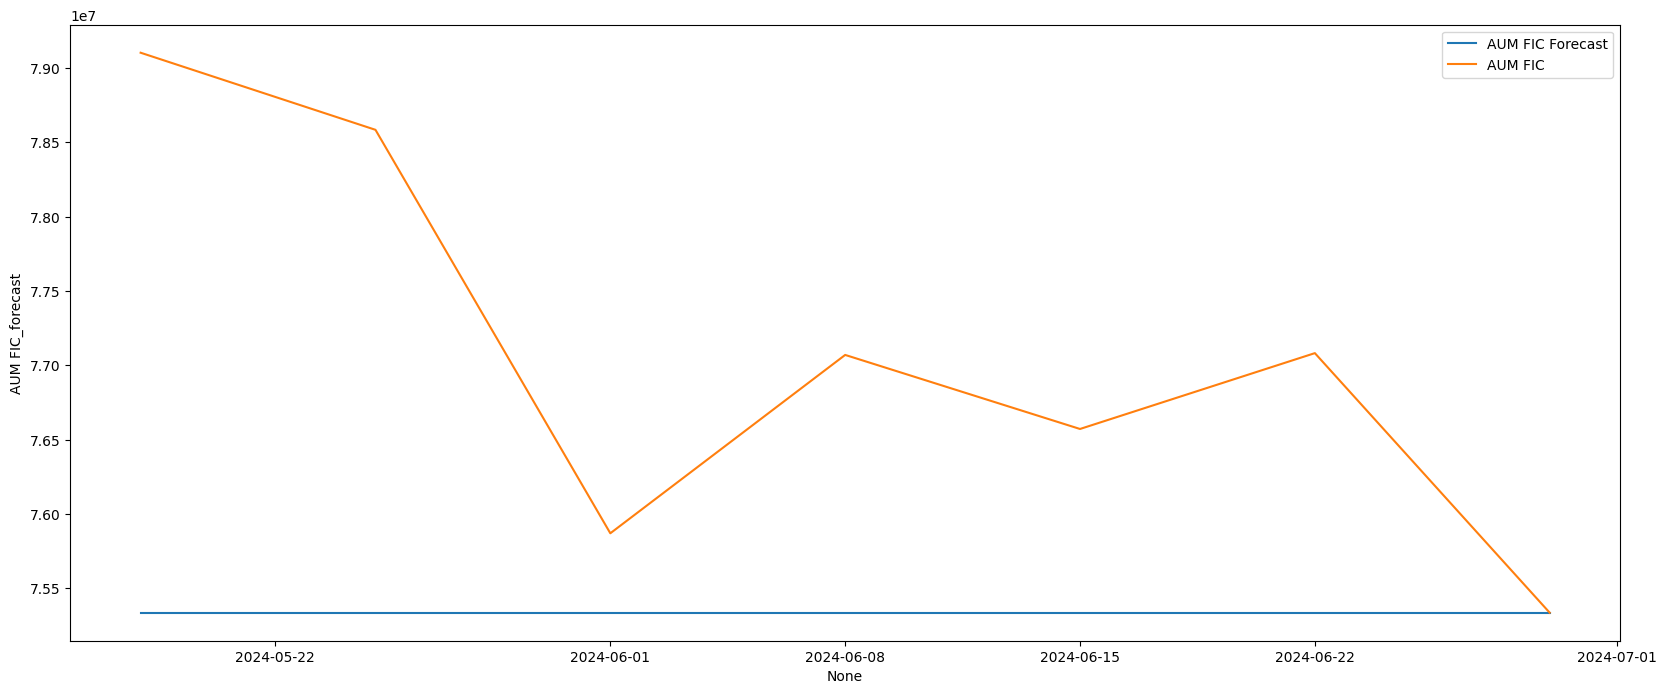

In [342]:
plt.rcParams['figure.figsize'] = (20,8)

sns.lineplot(resultados_arimax, x= resultados_arimax.index, y=resultados_arimax['AUM FIC_forecast'],label = 'AUM FIC Forecast')

sns.lineplot(serie_filtrada[-n_obs:], x= serie_filtrada.index[-n_obs:], y=serie_filtrada['AUM FIC'][-n_obs:],label = 'AUM FIC')

plt.show()

In [343]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, rmse, mae, mape

In [344]:
metricas_arima =  calculate_metrics(pd.DataFrame(serie_filtrada['AUM FIC'][-n_obs:]),pd.DataFrame(resultados_arima['AUM FIC_forecast']))

metricas_arimax = calculate_metrics(pd.DataFrame(serie_filtrada['AUM FIC'][-n_obs:]),pd.DataFrame(resultados_arimax['AUM FIC_forecast']))

In [345]:
# Comparar resultados
resultados = pd.DataFrame({
    'Model': ['ARIMA','ARIMAX',],
    'MSE': [metricas_arima[0],metricas_arimax[0]],
    'RMSE': [metricas_arima[1],metricas_arimax[1]],
    'MAE': [metricas_arima[2],metricas_arimax[2]],
    'MAPE': [metricas_arima[3],metricas_arimax[3]]
})

resultados

Model           MSE          RMSE           MAE  MAPE
0   ARIMA  1.542285e+13  3.927194e+06  3.805878e+06   NaN
1  ARIMAX  4.658559e+12  2.158370e+06  1.752242e+06   NaN

# VAR 1 - Las variables con correlación del AUM mayor a 0.5

### Estacionariedad

In [346]:
def estacionariedad(df):

    for i  in df.columns:

        a = sts.adfuller(df[i])[1]

        if a > 0.05:

            print(f'Serie de tiempo {i}')
            
            print(f'El valor p de {i} es de: {round(a,4)}, por esto la serie no es estacionaria')

            

        else:
            
            print(f'Serie de tiempo {i}')
            print(f'El valor p de {i} es de: {round(a,4)}, por esto la serie es estacionaria')  

In [347]:
estacionariedad(df)

Serie de tiempo AUM FIC
El valor p de AUM FIC es de: 0.7215, por esto la serie no es estacionaria
Serie de tiempo Efectivo
El valor p de Efectivo es de: 0.8202, por esto la serie no es estacionaria
Serie de tiempo Reserva Bancaria
El valor p de Reserva Bancaria es de: 0.5277, por esto la serie no es estacionaria
Serie de tiempo Del sector privado
El valor p de Del sector privado es de: 0.5455, por esto la serie no es estacionaria
Serie de tiempo Del sector público
El valor p de Del sector público es de: 0.0053, por esto la serie es estacionaria
Serie de tiempo Cuentas de ahorro
El valor p de Cuentas de ahorro es de: 0.7389, por esto la serie no es estacionaria
Serie de tiempo CDT 1/
El valor p de CDT 1/ es de: 0.9862, por esto la serie no es estacionaria
Serie de tiempo Otros depósitos a la vista
El valor p de Otros depósitos a la vista es de: 0.6422, por esto la serie no es estacionaria
Serie de tiempo Inflación anual %
El valor p de Inflación anual % es de: 0.86, por esto la serie no

### Transformar los datos

In [348]:
serie2 = df[['AUM FIC','Efectivo','CDT 1/','Otros depósitos a la vista','Valor hoy','Tasa 30 días',
       'Tasa A 45 días', 'Cuentas de ahorro',
       'VALOR']]

serie_dif_2 = serie2.diff().dropna()

serie_dif_2 = serie_dif_2[(serie_dif_2 != 0).all(axis=1)]

serie_dif_2

AUM FIC     Efectivo       CDT 1/  \
Fecha                                                
2019-07-27  33618.542030  1815.020698    65.212852   
2019-08-03   9543.654538  -410.134295     3.364935   
2019-08-17  13168.781914  -971.019228   236.825393   
2019-08-24   8147.554790   886.748653  -443.567393   
2019-08-31   9889.951959  1243.219915    21.059481   
...                  ...          ...          ...   
2024-06-01  22557.398097  1160.292575    13.080693   
2024-06-08  21575.713932  -320.642989  -217.978039   
2024-06-15  20545.053360   125.324028  1416.754917   
2024-06-22  17301.417742  2068.283621  1852.757649   
2024-06-29  24667.715961  2645.747965   147.132497   

            Otros depósitos a la vista  Valor hoy  Tasa 30 días  \
Fecha                                                             
2019-07-27                  860.734929      -0.72     -0.002977   
2019-08-03                 -839.925135      -1.25     -0.000367   
2019-08-17                 -387.128821       0.01     -0.004332   
2019-08-24                 1201.815323       0.39      0.013062   
2019-08-31                 -837.501222      -0.55      0.002821   
...                                ...        ...           ...   
2024-06-01                -1179.461882       1.54      0.000521   
2024-06-08                  550.162359       1.38     -0.000647   
2024-06-15                 -418.534610       0.85     -0.004460   
2024-06-22                 1317.693033       1.53      0.004295   
2024-06-29                 -632.930915      -0.40      0.001629   

            Tasa A 45 días  Cuentas de ahorro  VALOR  
Fecha                                                 
2019-07-27        0.010529        1847.140344  20.17  
2019-08-03       -0.018604         826.068489  36.55  
2019-08-17        0.022212       -2445.212410  -6.36  
2019-08-24        0.006672        3359.251033  22.96  
2019-08-31        0.005014        -328.482535 -36.86  
...                    ...                ...    ...  
2024-06-01        0.007839        3670.369404 -13.40  
2024-06-08       -0.001704        -900.516744   5.61  
2024-06-15       -0.000330       -3444.178762  44.03  
2024-06-22        0.006913        9907.251502 -32.24  
2024-06-29       -0.000289       -1529.331415 -10.06  

[233 rows x 9 columns]

In [349]:
estacionariedad(serie_dif_2)

Serie de tiempo AUM FIC
El valor p de AUM FIC es de: 0.0, por esto la serie es estacionaria
Serie de tiempo Efectivo
El valor p de Efectivo es de: 0.0, por esto la serie es estacionaria
Serie de tiempo CDT 1/
El valor p de CDT 1/ es de: 0.0039, por esto la serie es estacionaria
Serie de tiempo Otros depósitos a la vista
El valor p de Otros depósitos a la vista es de: 0.0, por esto la serie es estacionaria
Serie de tiempo Valor hoy
El valor p de Valor hoy es de: 0.0, por esto la serie es estacionaria
Serie de tiempo Tasa 30 días
El valor p de Tasa 30 días es de: 0.0, por esto la serie es estacionaria
Serie de tiempo Tasa A 45 días
El valor p de Tasa A 45 días es de: 0.0, por esto la serie es estacionaria
Serie de tiempo Cuentas de ahorro
El valor p de Cuentas de ahorro es de: 0.0222, por esto la serie es estacionaria
Serie de tiempo VALOR
El valor p de VALOR es de: 0.0, por esto la serie es estacionaria


### Conjunto de entrenamiento y prueba

In [350]:
train2 = serie_dif_2.iloc[:226]

test2 = serie_dif_2.iloc[226:]

print(train2.shape)

print(test2.shape)

(226, 9)
(7, 9)


### Modelo VAR

In [351]:
model_var_2 = VAR(train2)

resultados_var_2 = model_var_2.select_order()

resultados_var_2.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [352]:
resultados_var_2.selected_orders

{'aic': 1, 'bic': 0, 'hqic': 1, 'fpe': 1}

In [353]:
resultados_var_2 = model_var_2.fit(maxlags=1, ic= 'aic',method='ols')

display(resultados_var_2.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 28, Nov, 2024
Time:                     21:49:09
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    74.4673
Nobs:                     225.000    HQIC:                   73.6523
Log likelihood:          -11007.2    FPE:                5.59129e+31
AIC:                      73.1008    Det(Omega_mle):     3.78046e+31
--------------------------------------------------------------------
Results for equation AUM FIC
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                             -9562.502957      9675.510247           -0.988           0.323
L1.AUM FIC                            0.245631         0.065736            3.737           

### Prueba de causalidad de Wiener-Granger

#### Ho: La variable seleccionada no "causa en el sentido de Granger" a las demás variables

#### H1:La variable seleccionada si "causa en el sentido de Granger" a las demás variables

p-valor < 0.05 Rechazo Ho y mantengo la variable dentro del modelo

AUM FIC

In [354]:
grangercaus = resultados_var_2.test_causality(['Efectivo','CDT 1/','Otros depósitos a la vista','Valor hoy','Tasa 30 días',
       'Tasa A 45 días', 'Cuentas de ahorro',
       'VALOR'],['AUM FIC'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Efectivo

In [355]:
grangercaus = resultados_var_2.test_causality(['AUM FIC','CDT 1/','Otros depósitos a la vista','Valor hoy','Tasa 30 días',
       'Tasa A 45 días', 'Cuentas de ahorro',
       'VALOR'],['Efectivo'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

CDT

In [356]:
grangercaus = resultados_var_2.test_causality(['AUM FIC','Efectivo','Otros depósitos a la vista','Valor hoy','Tasa 30 días',
       'Tasa A 45 días', 'Cuentas de ahorro',
       'VALOR'],['CDT 1/'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Otros depositos a la vista

In [357]:
grangercaus = resultados_var_2.test_causality(['AUM FIC','Efectivo','CDT 1/','Valor hoy','Tasa 30 días',
       'Tasa A 45 días', 'Cuentas de ahorro',
       'VALOR'],['Otros depósitos a la vista'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Valor COLTES

In [358]:
grangercaus = resultados_var_2.test_causality(['AUM FIC','Efectivo','CDT 1/','Otros depósitos a la vista','Tasa 30 días',
       'Tasa A 45 días', 'Cuentas de ahorro',
       'VALOR'],['Valor hoy'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Tasa 30 días

In [359]:
grangercaus = resultados_var_2.test_causality(['AUM FIC','Efectivo','CDT 1/','Otros depósitos a la vista','Valor hoy',
       'Tasa A 45 días', 'Cuentas de ahorro',
       'VALOR'],['Tasa 30 días'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Tasa a 45 días

In [360]:
grangercaus = resultados_var_2.test_causality(['AUM FIC','Efectivo','CDT 1/','Otros depósitos a la vista','Valor hoy','Tasa 30 días',
        'Cuentas de ahorro',
       'VALOR'],['Tasa A 45 días'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Cuentas de ahorro

In [361]:
grangercaus = resultados_var_2.test_causality(['AUM FIC','Efectivo','CDT 1/','Otros depósitos a la vista','Valor hoy','Tasa 30 días',
       'Tasa A 45 días',
       'VALOR'],['Cuentas de ahorro'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Valor Dólar

In [362]:
grangercaus = resultados_var_2.test_causality(['AUM FIC','Efectivo','CDT 1/','Otros depósitos a la vista','Valor hoy','Tasa 30 días',
       'Tasa A 45 días','Cuentas de ahorro'
       ],['VALOR'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Matriz de causalidad de Granger

In [363]:
lag_order = resultados_var_2.k_ar

test = 'ssr_chi2test'

def granger_causality_matrix(train_transformed, variables, test = 'ssr_chi2test', verbose = False ):

    dataset = pd.DataFrame(np.zeros((len(variables),len(variables))),columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:

            test_result = grangercausalitytests(train_transformed[[r,c]],maxlag=lag_order,verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(lag_order)]

            if verbose:

                print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c]   = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset        

In [364]:
granger_causality_matrix(train2,variables=train2.columns)

AUM FIC_x  Efectivo_x  CDT 1/_x  \
AUM FIC_y                        1.0000      0.8859    0.0238   
Efectivo_y                       0.6958      1.0000    0.0004   
CDT 1/_y                         0.1845      0.5119    1.0000   
Otros depósitos a la vista_y     0.8280      0.3805    0.1033   
Valor hoy_y                      0.9241      0.8763    0.8637   
Tasa 30 días_y                   0.6616      0.1173    0.7293   
Tasa A 45 días_y                 0.7587      0.7413    0.4644   
Cuentas de ahorro_y              0.6397      0.0027    0.0001   
VALOR_y                          0.3861      0.2035    0.9351   

                              Otros depósitos a la vista_x  Valor hoy_x  \
AUM FIC_y                                           0.1438       0.7736   
Efectivo_y                                          0.0006       0.2426   
CDT 1/_y                                            0.5967       0.9031   
Otros depósitos a la vista_y                        1.0000       0.8488   
Valor hoy_y                                         0.8291       1.0000   
Tasa 30 días_y                                      0.7416       0.7604   
Tasa A 45 días_y                                    0.7531       0.7327   
Cuentas de ahorro_y                                 0.9156       0.6701   
VALOR_y                                             0.0010       0.9594   

                              Tasa 30 días_x  Tasa A 45 días_x  \
AUM FIC_y                             0.7249            0.5495   
Efectivo_y                            0.7737            0.5338   
CDT 1/_y                              0.9920            0.1854   
Otros depósitos a la vista_y          0.0808            0.6148   
Valor hoy_y                           0.4623            0.4074   
Tasa 30 días_y                        1.0000            0.4884   
Tasa A 45 días_y                      0.7095            1.0000   
Cuentas de ahorro_y                   0.5097            0.0371   
VALOR_y                               0.4478            0.6037   

                              Cuentas de ahorro_x  VALOR_x  
AUM FIC_y                                  0.7970   0.5369  
Efectivo_y                                 0.0000   0.8659  
CDT 1/_y                                   0.8536   0.5645  
Otros depósitos a la vista_y               0.1813   0.7647  
Valor hoy_y                                0.9004   0.9438  
Tasa 30 días_y                             0.3135   0.3161  
Tasa A 45 días_y                           0.0636   0.4392  
Cuentas de ahorro_y                        1.0000   0.7289  
VALOR_y                                    0.5627   1.0000

### Residuos

In [365]:
residuos = resultados_var_2.resid


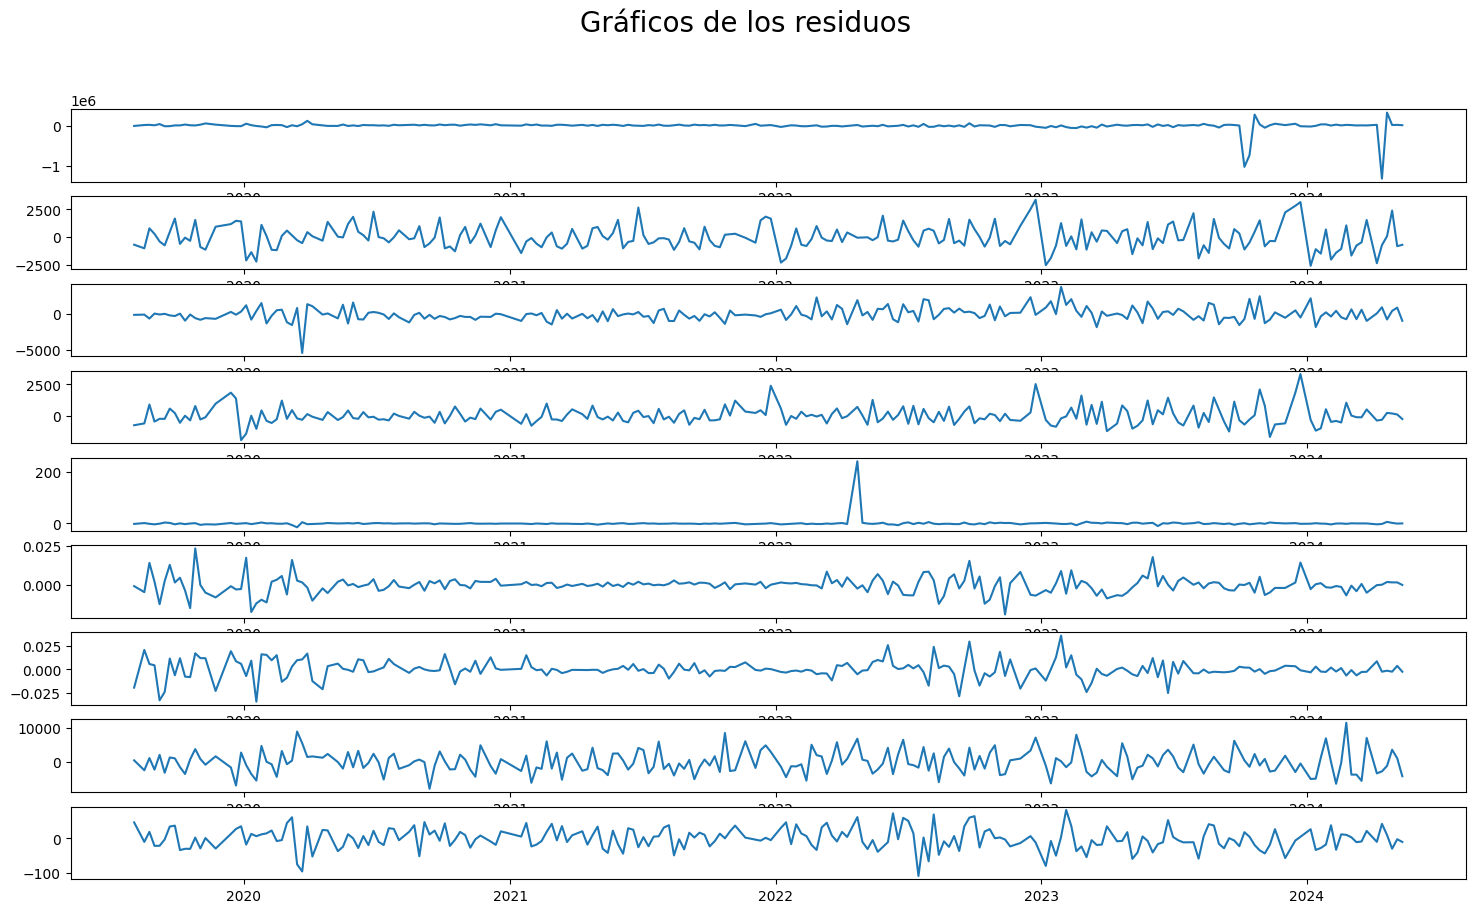

In [366]:
# Gráfico de los residuos
fig, axs = plt.subplots(9)

fig.suptitle('Gráficos de los residuos', fontsize = 20)

fig.set_size_inches(18,10)

[axs[i].plot(residuos.iloc[:,i]) for i in range(9)]

plt.show()

Dickey Fuller a los residuos

In [367]:
[sts.adfuller(residuos.iloc[:,i])[1] for i in range(9)]

[7.706209625751821e-27,
 1.0670265057957749e-09,
 0.0024979816634564844,
 1.2733967454300321e-23,
 1.6667482980584463e-27,
 2.8049594142827648e-06,
 1.3825482362118398e-19,
 5.905671286053675e-07,
 2.898132109074822e-08]

Los residuos son estacionarios

### Valores Predichos

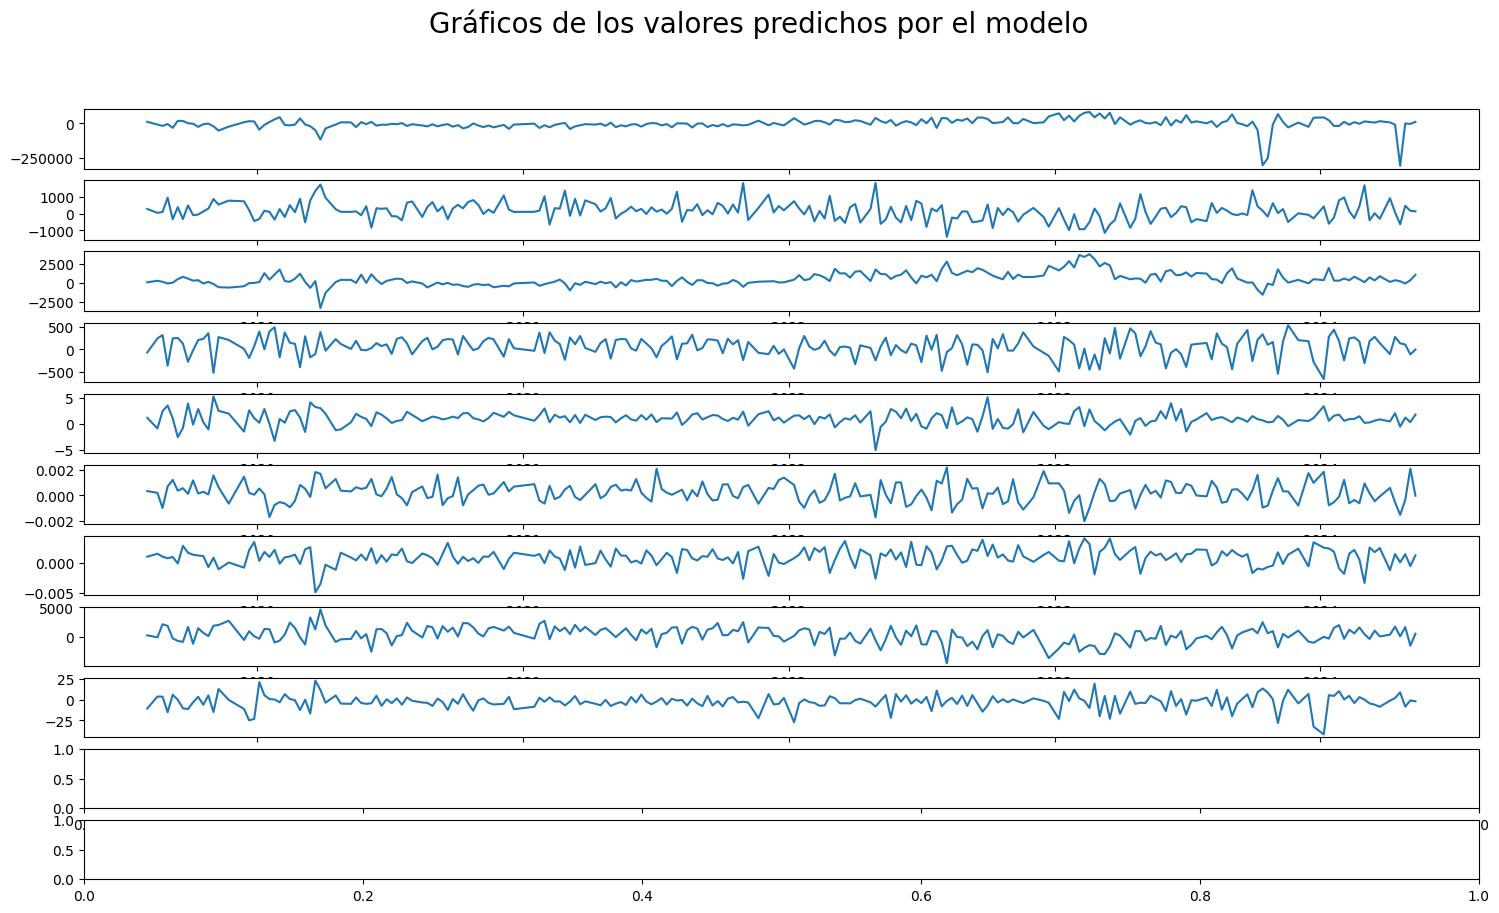

In [368]:
y_fitted = resultados_var_2.fittedvalues

fig , axs = plt.subplots(11)

fig.suptitle ('Gráficos de los valores predichos por el modelo',fontsize = 20)

fig.set_size_inches(18,10)

[axs[i].plot(y_fitted.iloc[:,i]) for i in range (9)]

plt.show()

In [369]:
lag_order = resultados_var_2.k_ar

input_data_2 = train2.values[-lag_order:]

# Forecasting

prediccion_2 = resultados_var_2.forecast(y=input_data_2,steps=n_obs)

prediccion_2 = (pd.DataFrame(prediccion_2,index=test2[-n_obs:].index, columns= test2.columns + '_pred'))

print('Predicciones')

prediccion_2

Predicciones


AUM FIC_pred  Efectivo_pred  CDT 1/_pred  \
Fecha                                                  
2024-05-18  -2476.722889    -161.035781   345.483500   
2024-05-25  -1885.820076     358.895490   440.533401   
2024-06-01  -4467.032804     163.408830   465.397325   
2024-06-08  -3750.467857     142.926247   491.822760   
2024-06-15  -3268.004297     159.885131   510.077019   
2024-06-22  -2892.147365     152.194116   521.565877   
2024-06-29  -2626.044580     148.184855   529.648690   

            Otros depósitos a la vista_pred  Valor hoy_pred  \
Fecha                                                         
2024-05-18                       252.725971        0.839169   
2024-05-25                        39.327972        1.296477   
2024-06-01                        59.758710        0.862288   
2024-06-08                        65.147348        0.967502   
2024-06-15                        62.068664        0.982583   
2024-06-22                        60.911131        0.963185   
2024-06-29                        60.988433        0.964460   

            Tasa 30 días_pred  Tasa A 45 días_pred  Cuentas de ahorro_pred  \
Fecha                                                                        
2024-05-18          -0.000058             0.001997              726.690967   
2024-05-25           0.000041             0.000616              904.472795   
2024-06-01           0.000351             0.000764              291.483189   
2024-06-08           0.000226             0.000966              417.532263   
2024-06-15           0.000219             0.000896              426.717054   
2024-06-22           0.000227             0.000907              395.515258   
2024-06-29           0.000222             0.000919              391.227631   

            VALOR_pred  
Fecha                   
2024-05-18   -3.605665  
2024-05-25   -3.614920  
2024-06-01   -2.004373  
2024-06-08   -2.844631  
2024-06-15   -2.620736  
2024-06-22   -2.615522  
2024-06-29   -2.634281

In [370]:
def invert_transformation(df_train , df_forecast , second_diff = False):

    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        if second_diff:
            df_fc[str(col) + '_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col) + '_2d'].cumsum()

        df_fc[str(col) + '_pred'] = df_train[col].iloc[-1] + df_fc[str(col)+'_pred'].cumsum()

    return df_fc   

In [371]:
# Traer el dataset original

lista = serie_dif_2.index

serie_filtrada_2 = serie2.loc[lista]

serie_filtrada_2

AUM FIC       Efectivo         CDT 1/  \
Fecha                                                    
2019-07-27  5.281838e+07   63309.722270  174724.088504   
2019-08-03  5.334741e+07   62899.587974  174727.453439   
2019-08-17  5.369593e+07   61706.721473  175307.328212   
2019-08-24  5.335509e+07   62593.470127  174863.760820   
2019-08-31  5.329419e+07   63836.690042  174884.820301   
...                  ...            ...            ...   
2024-06-01  7.587088e+07  108830.824490  305755.773893   
2024-06-08  7.707061e+07  108510.181501  305537.795854   
2024-06-15  7.657252e+07  108635.505529  306954.550771   
2024-06-22  7.708270e+07  110703.789150  308807.308420   
2024-06-29  7.533655e+07  113349.537115  308954.440917   

            Otros depósitos a la vista  Valor hoy  Tasa 30 días  \
Fecha                                                             
2019-07-27                 5616.324019     286.11      0.017845   
2019-08-03                 4776.398885     284.93      0.018803   
2019-08-17                 4609.487949     287.77      0.014432   
2019-08-24                 5811.303271     286.88      0.016849   
2019-08-31                 4973.802049     285.91      0.020190   
...                                ...        ...           ...   
2024-06-01                10301.086517     336.88      0.093941   
2024-06-08                10851.248876     340.15      0.093421   
2024-06-15                10432.714266     336.93      0.094052   
2024-06-22                11750.407298     339.74      0.095873   
2024-06-29                11117.476384     340.60      0.094103   

            Tasa A 45 días  Cuentas de ahorro    VALOR  
Fecha                                                   
2019-07-27        0.040455      187040.794645  3233.26  
2019-08-03        0.010344      187866.863134  3365.78  
2019-08-17        0.034729      184358.911006  3441.40  
2019-08-24        0.019300      187718.162039  3399.95  
2019-08-31        0.006014      187389.679505  3427.29  
...                    ...                ...      ...  
2024-06-01        0.095101      294865.576409  3860.92  
2024-06-08        0.091220      293965.059665  3944.14  
2024-06-15        0.092746      290520.880903  4151.55  
2024-06-22        0.094564      300428.132405  4143.72  
2024-06-29        0.095236      298898.800990  4148.04  

[233 rows x 9 columns]

In [372]:
output_2 = invert_transformation(serie_filtrada_2[-n_obs:],prediccion_2)

output_2

AUM FIC_pred  Efectivo_pred    CDT 1/_pred  \
Fecha                                                    
2024-05-18  7.533407e+07  113188.501334  309299.924417   
2024-05-25  7.533218e+07  113547.396823  309740.457818   
2024-06-01  7.532772e+07  113710.805653  310205.855143   
2024-06-08  7.532397e+07  113853.731900  310697.677903   
2024-06-15  7.532070e+07  114013.617031  311207.754921   
2024-06-22  7.531781e+07  114165.811147  311729.320798   
2024-06-29  7.531518e+07  114313.996002  312258.969488   

            Otros depósitos a la vista_pred  Valor hoy_pred  \
Fecha                                                         
2024-05-18                     11370.202355      341.439169   
2024-05-25                     11409.530327      342.735646   
2024-06-01                     11469.289037      343.597935   
2024-06-08                     11534.436386      344.565436   
2024-06-15                     11596.505050      345.548019   
2024-06-22                     11657.416181      346.511204   
2024-06-29                     11718.404614      347.475664   

            Tasa 30 días_pred  Tasa A 45 días_pred  Cuentas de ahorro_pred  \
Fecha                                                                        
2024-05-18           0.094045             0.097233           299625.491956   
2024-05-25           0.094086             0.097849           300529.964751   
2024-06-01           0.094437             0.098613           300821.447940   
2024-06-08           0.094663             0.099578           301238.980203   
2024-06-15           0.094882             0.100474           301665.697257   
2024-06-22           0.095109             0.101381           302061.212516   
2024-06-29           0.095331             0.102300           302452.440147   

             VALOR_pred  
Fecha                    
2024-05-18  4144.434335  
2024-05-25  4140.819416  
2024-06-01  4138.815042  
2024-06-08  4135.970412  
2024-06-15  4133.349676  
2024-06-22  4130.734153  
2024-06-29  4128.099872

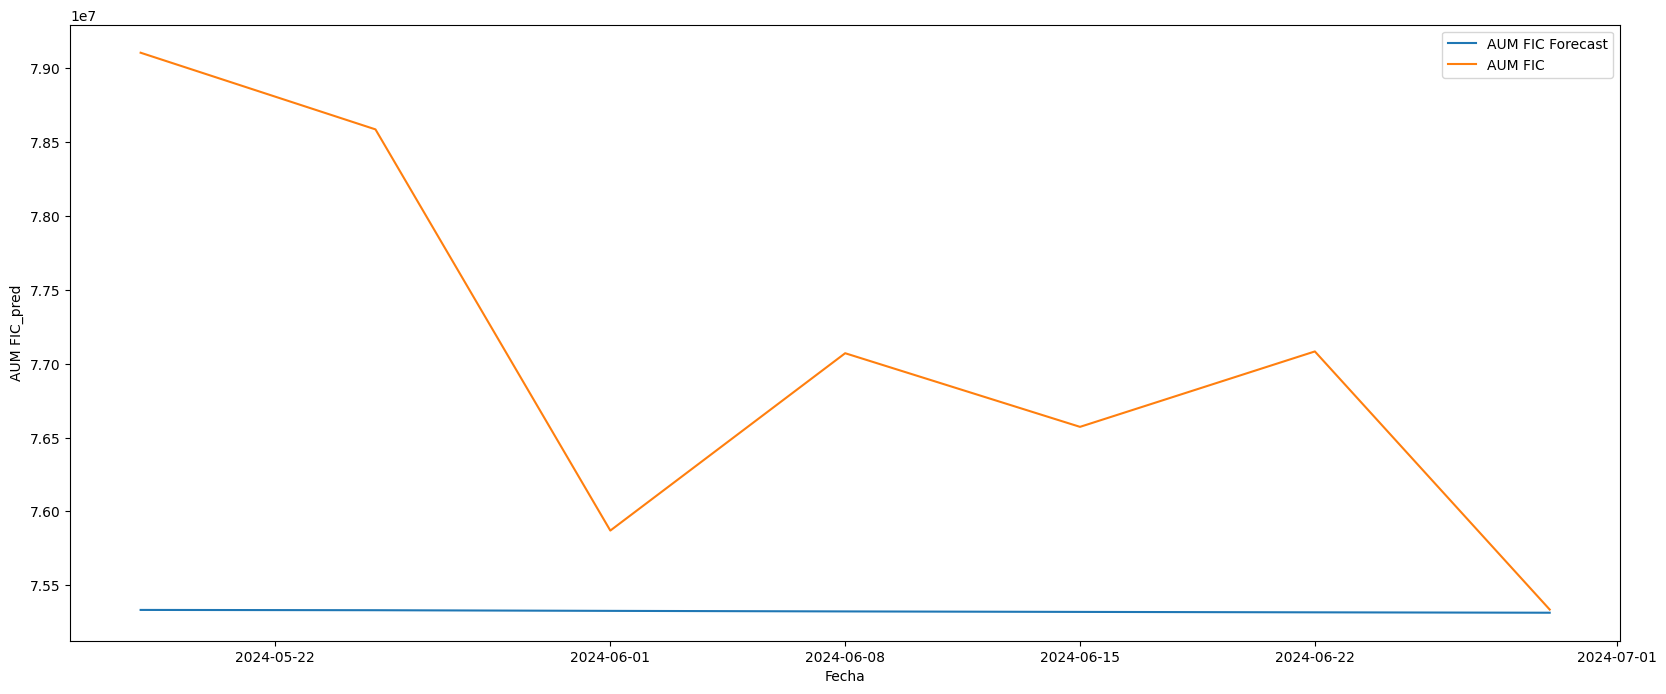

In [373]:
plt.rcParams['figure.figsize'] = (20,8)

sns.lineplot(output_2, x= output_2.index, y=output_2['AUM FIC_pred'],label = 'AUM FIC Forecast')

sns.lineplot(serie_filtrada_2[-n_obs:], x= serie_filtrada_2[-n_obs:].index, y=serie_filtrada_2['AUM FIC'][-n_obs:],label = 'AUM FIC')

plt.show()

### Evaluación del modelo

In [374]:
metricas_var_2 = calculate_metrics(serie_filtrada_2['AUM FIC'].tail(n_obs),output_2['AUM FIC_pred'])

metricas_var_2

(4687990540619.318, 2165176.7920009024, 1764271.4415183493, 2.2627315744965597)

In [375]:
# Comparar resultados
resultados = pd.DataFrame({
    'Model': ['VAR1'],
    'MSE': [metricas_var_2[0]],
    'RMSE': [metricas_var_2[1]],
    'MAE': [metricas_var_2[1]],
    'MAPE': [metricas_var_2[1]]
})

resultados

Model           MSE          RMSE           MAE          MAPE
0  VAR1  4.687991e+12  2.165177e+06  2.165177e+06  2.165177e+06

In [376]:
serie_filtrada_2.columns

Index(['AUM FIC', 'Efectivo', 'CDT 1/', 'Otros depósitos a la vista',
       'Valor hoy', 'Tasa 30 días', 'Tasa A 45 días', 'Cuentas de ahorro',
       'VALOR'],
      dtype='object')

## VAR 2 - Efectivo, CDT, Otros Depósitos a la Vista, Cuentas de ahorro

### Transformar los datos

In [377]:
serie3 = df[['AUM FIC','Efectivo','CDT 1/','Otros depósitos a la vista','Cuentas de ahorro']]

serie_dif_3 = serie3.diff().dropna()

serie_dif_3 = serie_dif_3[(serie_dif_3 != 0).all(axis=1)]

serie_dif_3

AUM FIC     Efectivo       CDT 1/  \
Fecha                                                
2018-01-06   6734.988641 -1912.465334   -67.310789   
2018-01-13   7047.624598 -1158.360789  1177.492029   
2018-01-20   6779.730104 -1210.942647  1198.851193   
2018-01-27   8954.972046  1139.615413   482.948687   
2018-02-03   6038.756100 -1013.654724   721.818570   
...                  ...          ...          ...   
2024-06-01  22557.398097  1160.292575    13.080693   
2024-06-08  21575.713932  -320.642989  -217.978039   
2024-06-15  20545.053360   125.324028  1416.754917   
2024-06-22  17301.417742  2068.283621  1852.757649   
2024-06-29  24667.715961  2645.747965   147.132497   

            Otros depósitos a la vista  Cuentas de ahorro  
Fecha                                                      
2018-01-06                 -803.944701        -765.070154  
2018-01-13                  159.989913       -2382.466305  
2018-01-20                 -304.867989       -4088.346722  
2018-01-27                  663.183564        2937.103218  
2018-02-03                 -458.416016       -2152.534280  
...                                ...                ...  
2024-06-01                -1179.461882        3670.369404  
2024-06-08                  550.162359        -900.516744  
2024-06-15                 -418.534610       -3444.178762  
2024-06-22                 1317.693033        9907.251502  
2024-06-29                 -632.930915       -1529.331415  

[339 rows x 5 columns]

### Conjunto de entrenamiento y conjunto de prueba

In [378]:
train3 = serie_dif_3.iloc[:332]

test3 = serie_dif_3.iloc[332:]

print(train3.shape)

print(test3.shape)

(332, 5)
(7, 5)


### Modelo VAR

In [379]:
model_var_3 = VAR(train3)

resultados_var_3 = model_var_3.select_order()

resultados_var_3.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [380]:
resultados_var_3.selected_orders

{'aic': 15, 'bic': 2, 'hqic': 5, 'fpe': 15}

In [381]:
resultados_var_3 = model_var_3.fit(maxlags=15, ic= 'aic',method='ols')

display(resultados_var_3.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 28, Nov, 2024
Time:                     21:49:11
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    82.3484
Nobs:                     317.000    HQIC:                   79.6423
Log likelihood:          -14207.0    FPE:                6.71749e+33
AIC:                      77.8424    Det(Omega_mle):     2.29372e+33
--------------------------------------------------------------------
Results for equation AUM FIC
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                              12805.356354     10692.573543            1.198           0.231
L1.AUM FIC                             0.217012         0.062710            3.461       

AUM FIC

In [382]:
grangercaus = resultados_var_3.test_causality(['Efectivo','CDT 1/','Otros depósitos a la vista','Cuentas de ahorro'
       ],['AUM FIC'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Efectivo

In [383]:
grangercaus = resultados_var_3.test_causality(['AUM FIC','CDT 1/','Otros depósitos a la vista','Cuentas de ahorro'],['Efectivo'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

CDT

In [384]:
grangercaus = resultados_var_3.test_causality(['AUM FIC','Efectivo','Otros depósitos a la vista','Cuentas de ahorro'],['CDT 1/'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Otros Depositos a la vista

In [385]:
grangercaus = resultados_var_3.test_causality(['AUM FIC','Efectivo','CDT 1/','Cuentas de ahorro'],['Otros depósitos a la vista'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### Residuos

In [386]:
residuos3 = resultados_var_3.resid

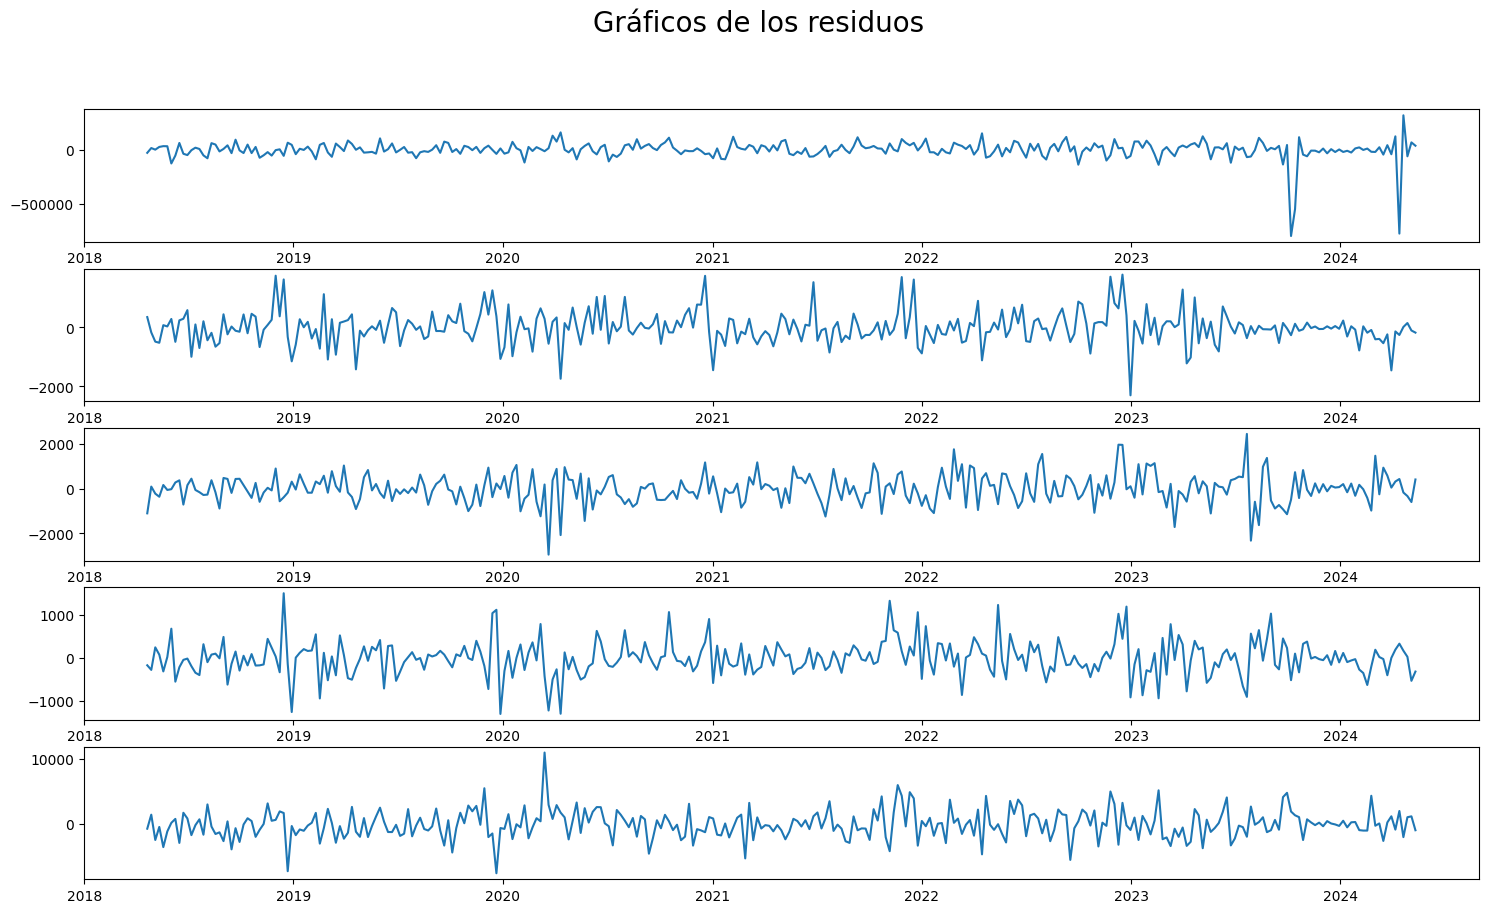

In [387]:
# Gráfico de los residuos
fig, axs = plt.subplots(5)

fig.suptitle('Gráficos de los residuos', fontsize = 20)

fig.set_size_inches(18,10)

[axs[i].plot(residuos3.iloc[:,i]) for i in range(5)]

plt.show()

Dickey Fuller a los residuos

In [388]:
[sts.adfuller(residuos3.iloc[:,i])[1] for i in range(5)]

[4.963034637299037e-30,
 3.092984429170018e-30,
 3.036121774195278e-30,
 4.2928237078325285e-30,
 3.46609014967302e-30]

Residuos estacionarios

### Valores Predichos

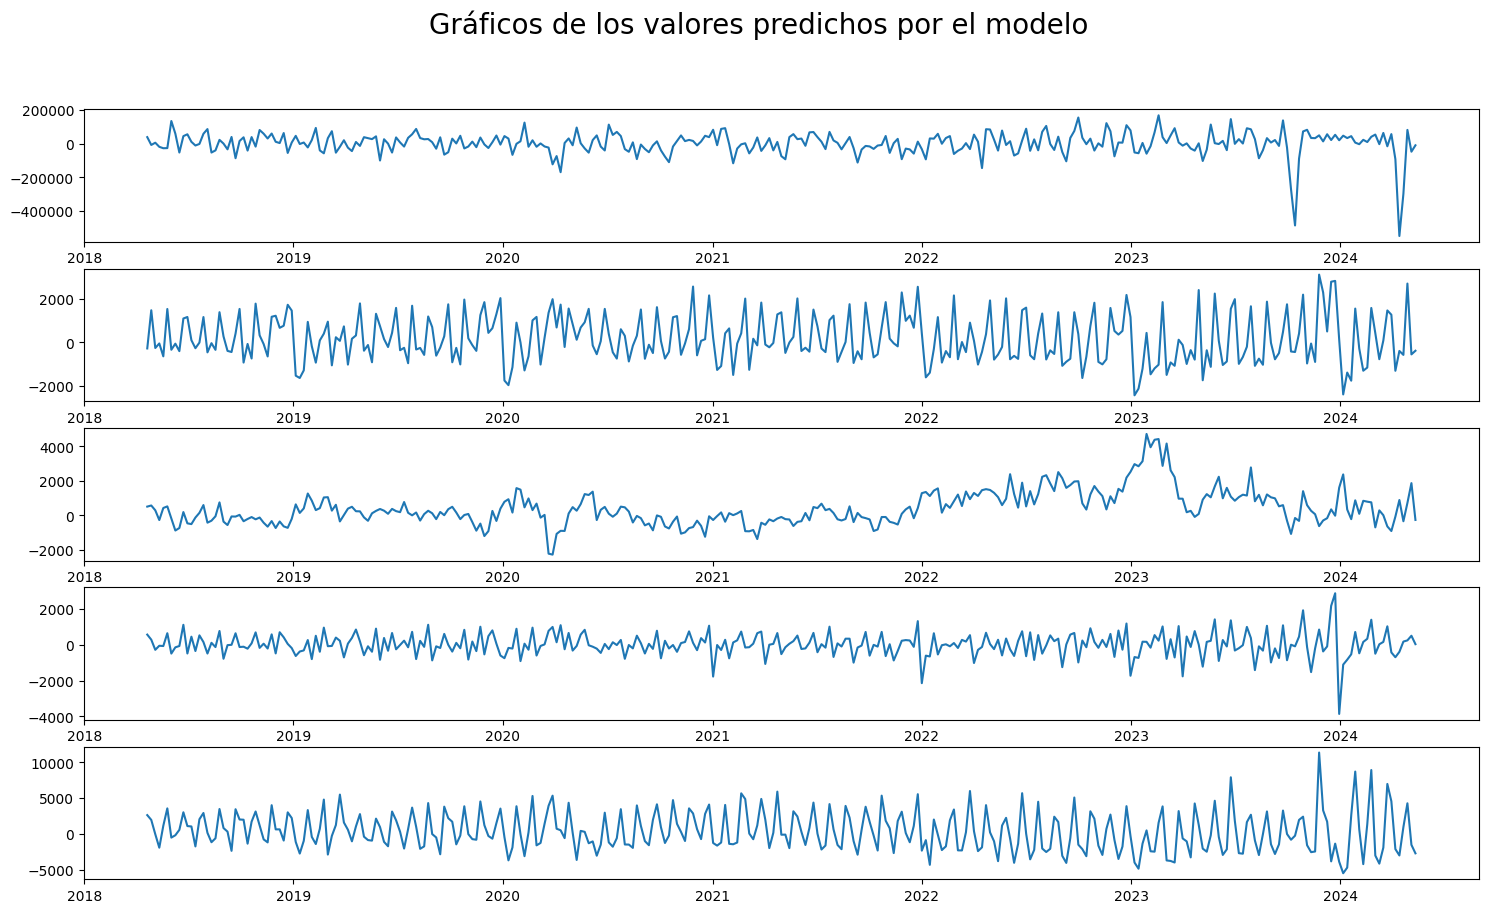

In [389]:
y_fitted_3 = resultados_var_3.fittedvalues

fig , axs = plt.subplots(5)

fig.suptitle ('Gráficos de los valores predichos por el modelo',fontsize = 20)

fig.set_size_inches(18,10)

[axs[i].plot(y_fitted_3.iloc[:,i]) for i in range (5)]

plt.show()

In [390]:
lag_order_3 = resultados_var_3.k_ar

input_data_3 = train3.values[-lag_order_3:]

# Forecasting

pred_3 = resultados_var_3.forecast(y=input_data_3,steps=n_obs)

pred_3 = (pd.DataFrame(pred_3,index=test3[-n_obs:].index, columns= test3.columns + '_pred'))

print('Predicciones')

pred_3

Predicciones


AUM FIC_pred  Efectivo_pred  CDT 1/_pred  \
Fecha                                                   
2024-05-18    9622.171075    -277.768685  1695.883009   
2024-05-25   54540.467419    2199.838838  -648.768652   
2024-06-01   34087.424394    2145.459527  -207.027566   
2024-06-08  173804.238259    -478.131842  -315.419971   
2024-06-15  192544.914149     -55.769788   635.125941   
2024-06-22   27567.917540    4680.715380 -1321.500423   
2024-06-29   78124.445794     844.285023   330.905030   

            Otros depósitos a la vista_pred  Cuentas de ahorro_pred  
Fecha                                                                
2024-05-18                      -931.485590            -1973.603064  
2024-05-25                      2808.105463             5525.368340  
2024-06-01                     -2978.932983            10867.533456  
2024-06-08                      2114.992961            -7393.814315  
2024-06-15                     -2599.207312             7736.354473  
2024-06-22                      6590.664117            -9005.116261  
2024-06-29                     -3162.641344             7609.052545

In [391]:
# Traer el dataset original

lista_3 = serie_dif_3.index

serie_filtrada_3 = serie3.loc[lista_3]

serie_filtrada_3

AUM FIC       Efectivo         CDT 1/  \
Fecha                                                    
2018-01-06  4.464748e+07   56599.538551  160158.814562   
2018-01-13  4.472463e+07   55441.177763  161336.306592   
2018-01-20  4.419130e+07   54230.235116  162535.157785   
2018-01-27  4.425412e+07   55369.850529  163018.106472   
2018-02-03  4.510664e+07   54356.195805  163739.925042   
...                  ...            ...            ...   
2024-06-01  7.587088e+07  108830.824490  305755.773893   
2024-06-08  7.707061e+07  108510.181501  305537.795854   
2024-06-15  7.657252e+07  108635.505529  306954.550771   
2024-06-22  7.708270e+07  110703.789150  308807.308420   
2024-06-29  7.533655e+07  113349.537115  308954.440917   

            Otros depósitos a la vista  Cuentas de ahorro  
Fecha                                                      
2018-01-06                 4524.240271      169252.278075  
2018-01-13                 4684.230184      166869.811770  
2018-01-20                 4379.362195      162781.465049  
2018-01-27                 5042.545758      165718.568266  
2018-02-03                 4584.129743      163566.033986  
...                                ...                ...  
2024-06-01                10301.086517      294865.576409  
2024-06-08                10851.248876      293965.059665  
2024-06-15                10432.714266      290520.880903  
2024-06-22                11750.407298      300428.132405  
2024-06-29                11117.476384      298898.800990  

[339 rows x 5 columns]

In [392]:
output_3 = invert_transformation(serie_filtrada_3[-n_obs:],pred_3)

output_3

AUM FIC_pred  Efectivo_pred    CDT 1/_pred  \
Fecha                                                    
2024-05-18  7.534617e+07  113071.768430  310650.323926   
2024-05-25  7.540071e+07  115271.607268  310001.555275   
2024-06-01  7.543480e+07  117417.066795  309794.527708   
2024-06-08  7.560860e+07  116938.934953  309479.107737   
2024-06-15  7.580114e+07  116883.165165  310114.233678   
2024-06-22  7.582871e+07  121563.880545  308792.733255   
2024-06-29  7.590684e+07  122408.165568  309123.638286   

            Otros depósitos a la vista_pred  Cuentas de ahorro_pred  
Fecha                                                                
2024-05-18                     10185.990794           296925.197926  
2024-05-25                     12994.096257           302450.566266  
2024-06-01                     10015.163275           313318.099722  
2024-06-08                     12130.156236           305924.285408  
2024-06-15                      9530.948924           313660.639881  
2024-06-22                     16121.613041           304655.523620  
2024-06-29                     12958.971697           312264.576166

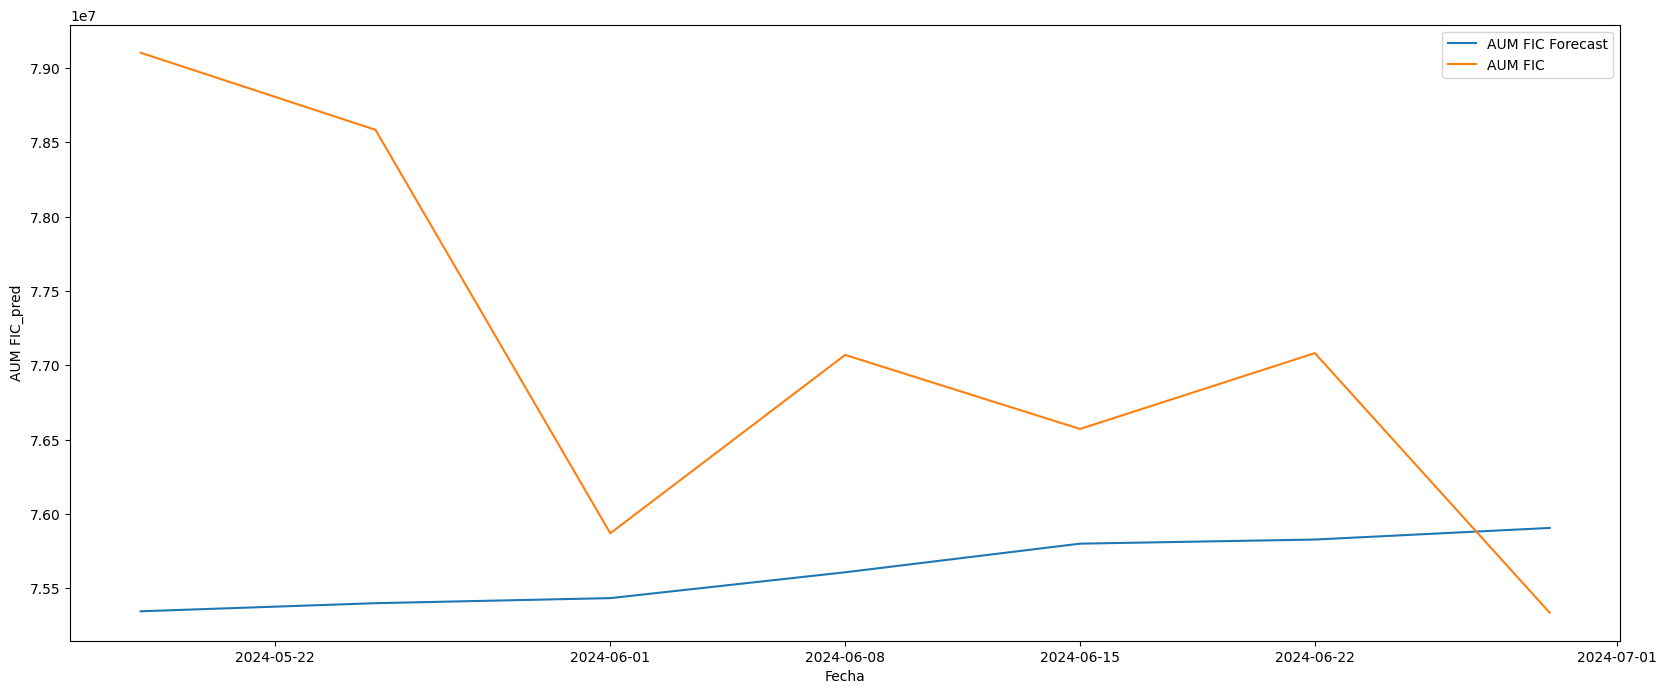

In [393]:
plt.rcParams['figure.figsize'] = (20,8)

sns.lineplot(output_3, x= output_3.index, y=output_3['AUM FIC_pred'],label = 'AUM FIC Forecast')

sns.lineplot(serie_filtrada_3[-n_obs:], x= serie_filtrada_3[-n_obs:].index, y=serie_filtrada_3['AUM FIC'][-n_obs:],label = 'AUM FIC')

plt.show()

### Evaluación del modelo

In [394]:
metricas_var_3 = calculate_metrics(serie_filtrada_3['AUM FIC'].tail(n_obs),output_3['AUM FIC_pred'])

metricas_var_3

(4153713797224.427, 2038066.1905896056, 1633590.3970283654, 2.094937516032349)

In [395]:
# Comparar resultados
resultados = pd.DataFrame({
    'Model': ['VAR1', 'VAR2'],
    'MSE': [metricas_var_2[0],metricas_var_3[0]],
    'RMSE': [metricas_var_2[1],metricas_var_3[1]],
    'MAE': [metricas_var_2[2],metricas_var_3[2]],
    'MAPE': [metricas_var_2[3],metricas_var_3[3]]
})

resultados

Model           MSE          RMSE           MAE      MAPE
0  VAR1  4.687991e+12  2.165177e+06  1.764271e+06  2.262732
1  VAR2  4.153714e+12  2.038066e+06  1.633590e+06  2.094938

## VAR 4 - CDT y Efectivo

### Transformar los datos

In [396]:
serie4 = df[['AUM FIC','CDT 1/','Efectivo']]

serie_dif_4 = serie4.diff().dropna()

serie_dif_4 = serie_dif_4[(serie_dif_4 != 0).all(axis=1)]

serie_dif_4

AUM FIC       CDT 1/     Efectivo
Fecha                                             
2018-01-06   6734.988641   -67.310789 -1912.465334
2018-01-13   7047.624598  1177.492029 -1158.360789
2018-01-20   6779.730104  1198.851193 -1210.942647
2018-01-27   8954.972046   482.948687  1139.615413
2018-02-03   6038.756100   721.818570 -1013.654724
...                  ...          ...          ...
2024-06-01  22557.398097    13.080693  1160.292575
2024-06-08  21575.713932  -217.978039  -320.642989
2024-06-15  20545.053360  1416.754917   125.324028
2024-06-22  17301.417742  1852.757649  2068.283621
2024-06-29  24667.715961   147.132497  2645.747965

[339 rows x 3 columns]

### Conjunto de entrenamiento y conjunto de prueba

In [397]:
train4 = serie_dif_4.iloc[:332]

test4 = serie_dif_4.iloc[332:]

print(train4.shape)

print(test4.shape)

(332, 3)
(7, 3)


### Modelo VAR

In [398]:
model_var_4 = VAR(train4)

resultados_var_4 = model_var_4.select_order()

resultados_var_4.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [399]:
resultados_var_4.selected_orders

{'aic': 14, 'bic': 6, 'hqic': 14, 'fpe': 14}

In [400]:
resultados_var_4 = model_var_4.fit(maxlags=14, ic= 'aic',method='ols')

display(resultados_var_4.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 28, Nov, 2024
Time:                     21:49:13
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    51.4497
Nobs:                     318.000    HQIC:                   50.5331
Log likelihood:          -9162.51    FPE:                4.82716e+21
AIC:                      49.9235    Det(Omega_mle):     3.29953e+21
--------------------------------------------------------------------
Results for equation AUM FIC
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const            -5293.450623      9623.392567           -0.550           0.582
L1.AUM FIC           0.274048         0.060171            4.554           0.000
L1.CDT 1/           15.930047         8.207330            1.94

AUM FIC

In [401]:
grangercaus = resultados_var_4.test_causality(['CDT 1/','Efectivo'],['AUM FIC'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

CDT

In [402]:
grangercaus = resultados_var_4.test_causality(['AUM FIC','Efectivo'],['CDT 1/'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Efectivo

In [403]:
grangercaus = resultados_var_4.test_causality(['AUM FIC','CDT 1/'],['Efectivo'],kind = 'f')

grangercaus.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### Residuos

In [404]:
residuos4 = resultados_var_4.resid

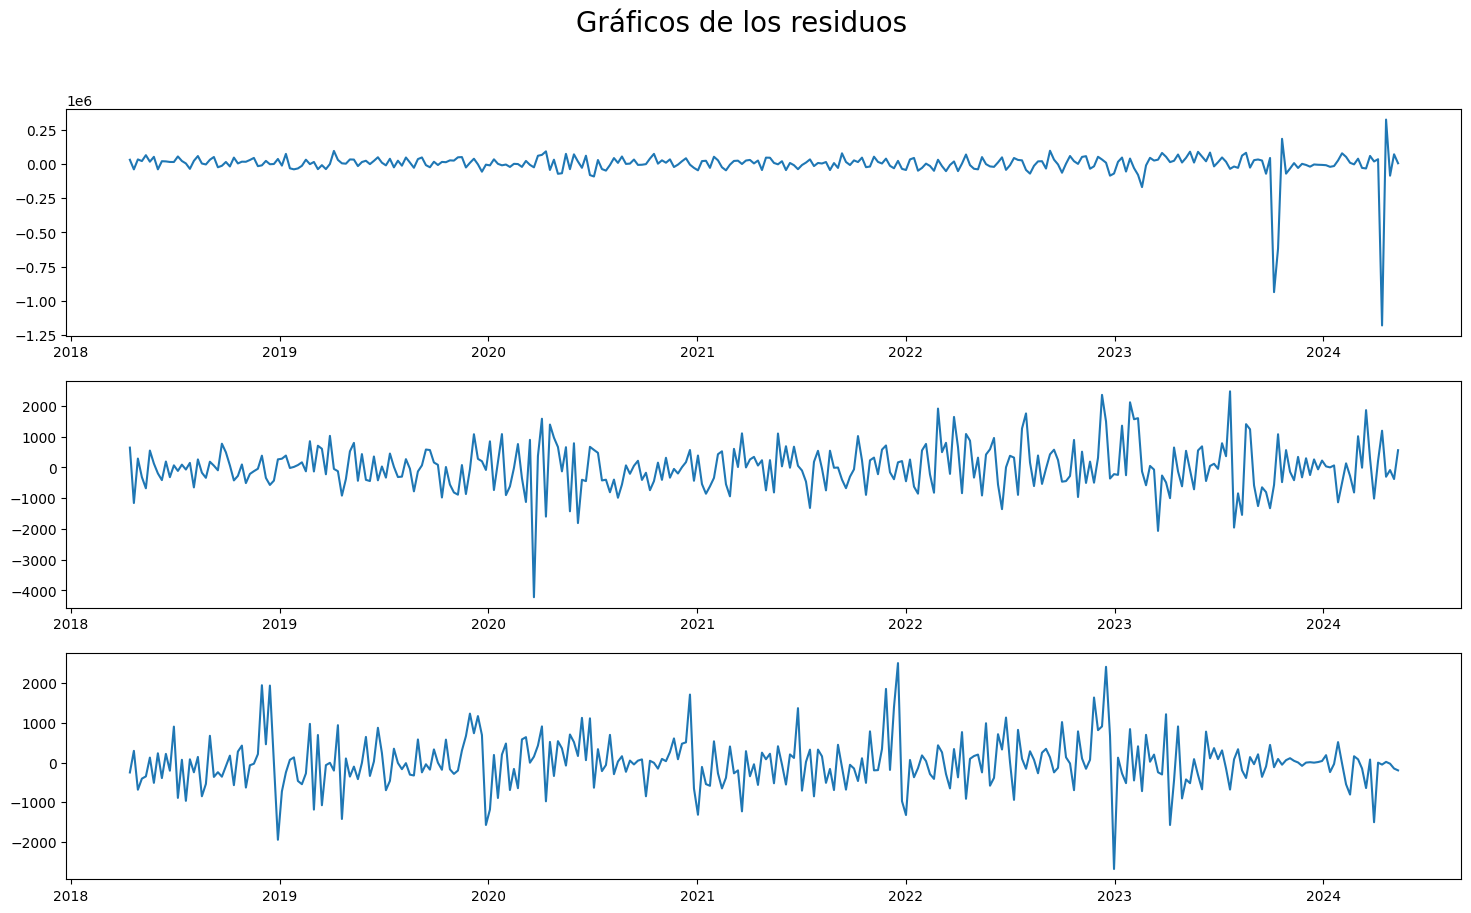

In [405]:
# Gráfico de los residuos
fig, axs = plt.subplots(3)

fig.suptitle('Gráficos de los residuos', fontsize = 20)

fig.set_size_inches(18,10)

[axs[i].plot(residuos4.iloc[:,i]) for i in range(3)]

plt.show()

Dickey Fuller a los residuos

In [406]:
[sts.adfuller(residuos4.iloc[:,i])[1] for i in range(3)]

[3.564329181498781e-30, 2.571591068138103e-30, 2.4883378773655626e-30]

### Valores Predichos

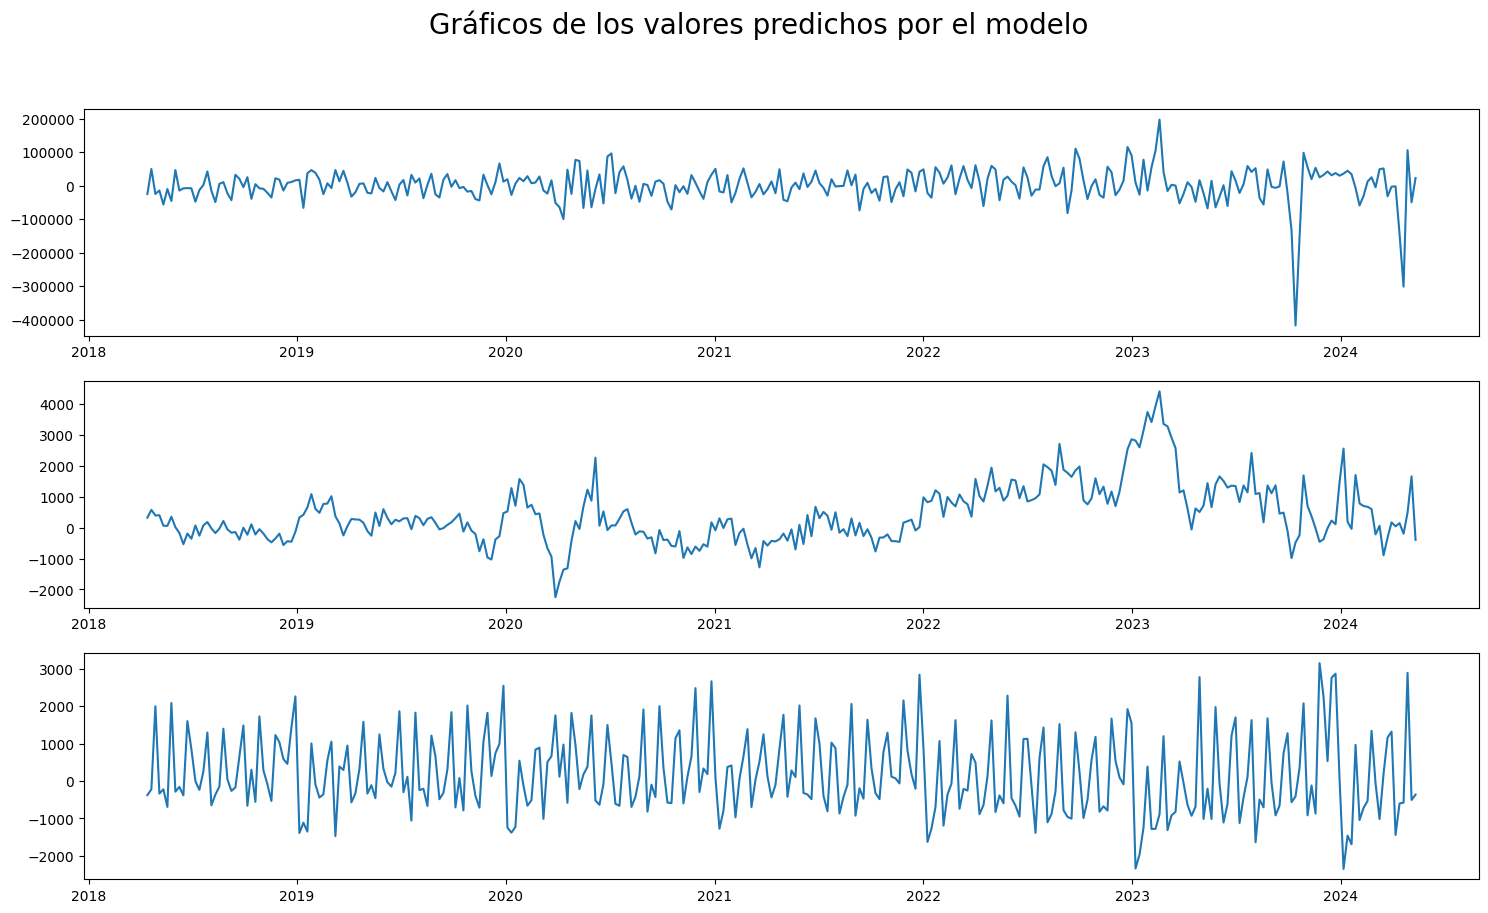

In [407]:
y_fitted_4 = resultados_var_4.fittedvalues

fig , axs = plt.subplots(3)

fig.suptitle ('Gráficos de los valores predichos por el modelo',fontsize = 20)

fig.set_size_inches(18,10)

[axs[i].plot(y_fitted_4.iloc[:,i]) for i in range (3)]

plt.show()

In [408]:
lag_order_4 = resultados_var_4.k_ar

input_data_4 = train4.values[-lag_order_4:]

# Forecasting

pred_4 = resultados_var_4.forecast(y=input_data_4,steps=n_obs)

pred_4 = (pd.DataFrame(pred_4,index=test4[-n_obs:].index, columns= test4.columns + '_pred'))

print('Predicciones')

pred_4

Predicciones


AUM FIC_pred  CDT 1/_pred  Efectivo_pred
Fecha                                                
2024-05-18  106891.722534  1221.379164    -355.123009
2024-05-25  -57213.323806  -706.772622    1748.003672
2024-06-01   69296.772362  -348.738697    1797.857528
2024-06-08  -53609.584779  -565.360405     247.238549
2024-06-15  167836.234966   632.398105     113.776611
2024-06-22  -26136.014206 -1042.585706    5030.601998
2024-06-29  -25532.166892   678.878541     231.432537

In [409]:
# Traer el dataset original

lista_4 = serie_dif_4.index

serie_filtrada_4 = serie4.loc[lista_4]

serie_filtrada_4

AUM FIC         CDT 1/       Efectivo
Fecha                                                 
2018-01-06  4.464748e+07  160158.814562   56599.538551
2018-01-13  4.472463e+07  161336.306592   55441.177763
2018-01-20  4.419130e+07  162535.157785   54230.235116
2018-01-27  4.425412e+07  163018.106472   55369.850529
2018-02-03  4.510664e+07  163739.925042   54356.195805
...                  ...            ...            ...
2024-06-01  7.587088e+07  305755.773893  108830.824490
2024-06-08  7.707061e+07  305537.795854  108510.181501
2024-06-15  7.657252e+07  306954.550771  108635.505529
2024-06-22  7.708270e+07  308807.308420  110703.789150
2024-06-29  7.533655e+07  308954.440917  113349.537115

[339 rows x 3 columns]

In [410]:
output_4 = invert_transformation(serie_filtrada_4[-n_obs:],pred_4)

output_4

AUM FIC_pred    CDT 1/_pred  Efectivo_pred
Fecha                                                 
2024-05-18  7.544344e+07  310175.820082  112994.414106
2024-05-25  7.538622e+07  309469.047459  114742.417777
2024-06-01  7.545552e+07  309120.308762  116540.275305
2024-06-08  7.540191e+07  308554.948357  116787.513854
2024-06-15  7.556975e+07  309187.346462  116901.290465
2024-06-22  7.554361e+07  308144.760756  121931.892463
2024-06-29  7.551808e+07  308823.639297  122163.325000

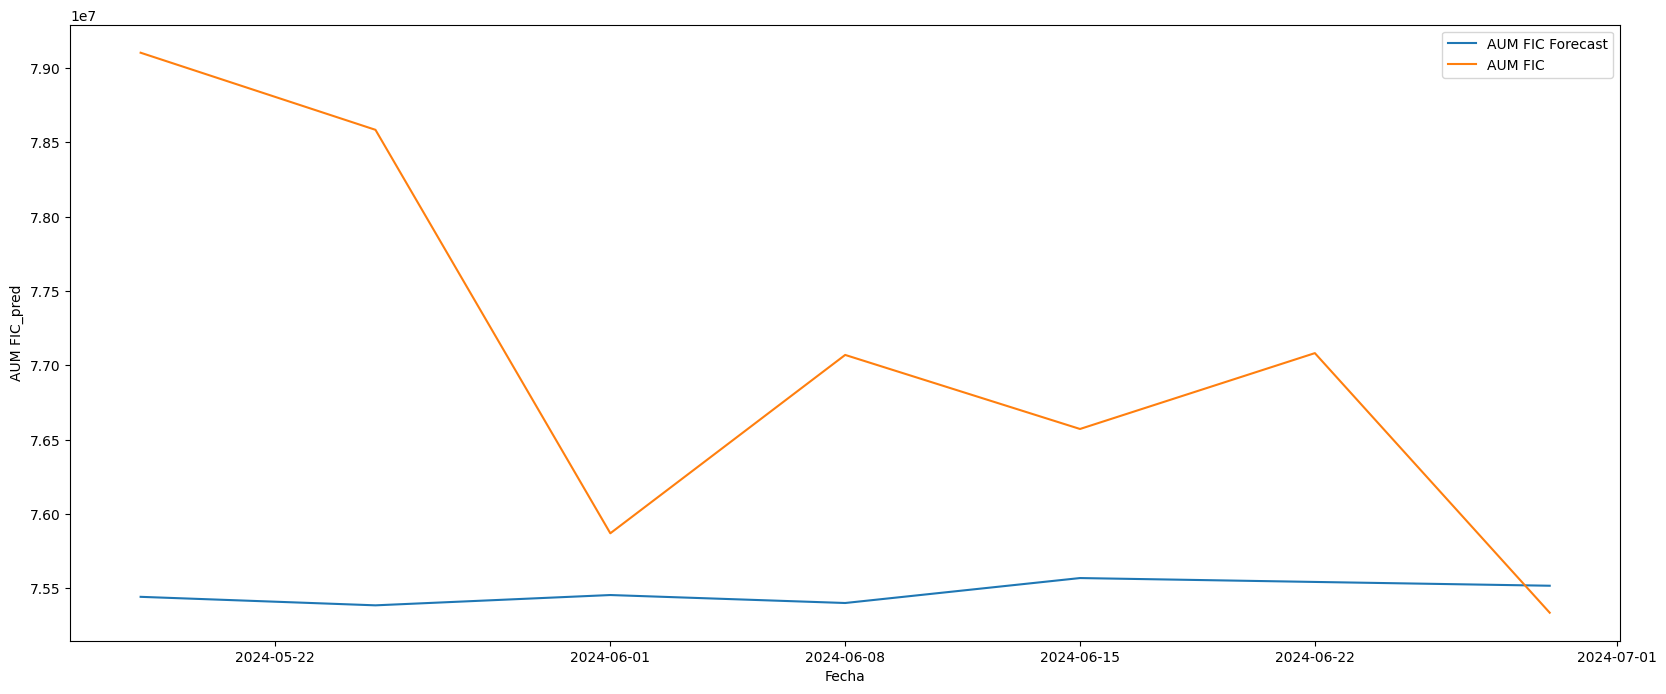

In [411]:
plt.rcParams['figure.figsize'] = (20,8)

sns.lineplot(output_4, x= output_4.index, y=output_4['AUM FIC_pred'],label = 'AUM FIC Forecast')

sns.lineplot(serie_filtrada_4[-n_obs:], x= serie_filtrada_4[-n_obs:].index, y=serie_filtrada_4['AUM FIC'][-n_obs:],label = 'AUM FIC')

plt.show()

### Evaluación del modelo

In [412]:
metricas_var_4 = calculate_metrics(serie_filtrada_4['AUM FIC'].tail(n_obs),output_4['AUM FIC_pred'])

metricas_var_4

(4284425880700.6396,
 2069885.4752620107,
 1666578.8364955762,
 2.1367033138615352)

In [413]:
# Comparar resultados
resultados = pd.DataFrame({
    'Model': ['VAR1', 'VAR2','VAR3','ARIMA','ARIMAX'],
    'MSE': [metricas_var_2[0],metricas_var_3[0],metricas_var_4[0],metricas_arima[0],metricas_arimax[0]],
    'RMSE': [metricas_var_2[1],metricas_var_3[1],metricas_var_4[1],metricas_arima[1],metricas_arimax[1]],
    'MAE': [metricas_var_2[2],metricas_var_3[2],metricas_var_4[2],metricas_arima[2],metricas_arimax[2]],
    'MAPE': [metricas_var_2[3],metricas_var_3[3],metricas_var_4[3],metricas_arima[3],metricas_arimax[3]]
})

resultados

Model           MSE          RMSE           MAE      MAPE
0    VAR1  4.687991e+12  2.165177e+06  1.764271e+06  2.262732
1    VAR2  4.153714e+12  2.038066e+06  1.633590e+06  2.094938
2    VAR3  4.284426e+12  2.069885e+06  1.666579e+06  2.136703
3   ARIMA  1.542285e+13  3.927194e+06  3.805878e+06       NaN
4  ARIMAX  4.658559e+12  2.158370e+06  1.752242e+06       NaN